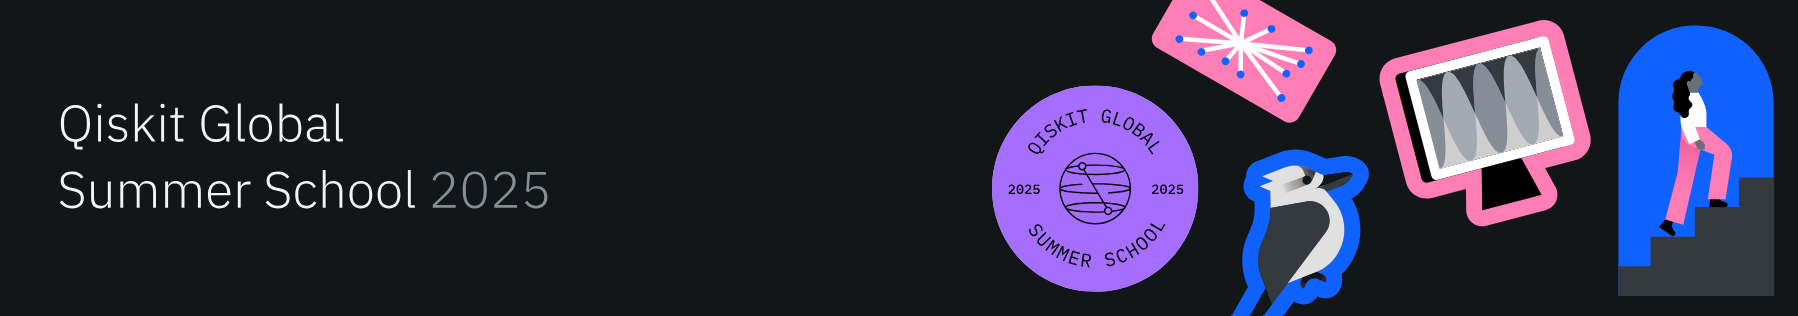

# IBM's Qiskit Global Summer School 2025

## Lab 1: Recreating Famous Experiments at Home

***

### Table of Contents

* [Welcome to the Qiskit Global Summer School 2025!](#welcome)
    - [Lab 1 Overview](#overview)
    - [Setup (Gathering Our Tools)](#setup)
    - [Imports](#imports)
<br><br>
* [Chapter 1: Superposition, Interference and Measurement](#superposition-interference-measurement)
    1.  [Double-Slit Experiment - Superposition and Interference](#double-slit-experiment)
    2.  [Schrödinger’s Cat Experiment and Double-Slit Revisit](#schrodinger-cat-experiment-double-slit-revisit)
<br><br>
* [Chapter 2: Quantum Entanglement](#entanglement)
    1.  [The Curious Case of Alice, Bob, and the Unbeatable Game - CHSH Game](#case-alice-bob-unbeatable-chsh-game)
    2.  [Quantum Teleportation - Sending Secrets with Spooky Action]()
        1.  Teleportation on a Simulator
<br><br>
* [Congratulations!](#congratulations)
    - [Bonus Challenge: Teleportation on Real Quantum Hardware](#bonus)

***

# Welcome to the Qiskit Global Summer School 2025!
<a id = "welcome"></a>

***

We are thrilled to welcome you to another year of the **Qiskit Global Summer School (QGSS)**. This two-week summer program combines theoretical lectures with hands-on exercises to expand the knowledge of **Quantum Computing** and **Quantum Programming** among the community of students, researchers, and professionals that use **Qiskit** in their everyday quantum journey. 

The hands-on component of this summer school consists of a series of **Jupyter Notebooks** ("_labs_") designed to guide you through different topics of interest.

Each lab complements the corresponding theoretical lectures and includes helpful links to documentation, tutorials, and references to the lectures. Furthermore, you can also find many useful resources in [**IBM Quantum Learning**](https://quantum.cloud.ibm.com/learning).

***

## Lab 1 Overview
<a id = "overview"></a>

***

Welcome to the very first lab of **Qiskit Global Summer School (QGSS) 2025**. Recall that **2025 was the International Year of Quantum**! In the first lab, we will explore four of the most important concepts of the **Quantum World**: **Quantum Superposition**, **Quantum Interference**, **Measurement**, and **Quantum Entanglement** - through hands-on experiments using **Qiskit**.

***

## Setup (Gathering Our Tools)
<a id="setup"></a>

***

Just like any good experiment, we first need to prepare our equipment. In our case, we need to prepare the **Python** libraries we will use, especially **Qiskit**, our **Quantum Computing** toolkit. You should be all set if you finished **lab 0**. If not, you can uncomment the follow cell to install the grader, which will install **Qiskit v2.x** and the necessary libraries necessary for the **Qiskit Global Summer School (QGSS) 2025**.

***

In [1]:
# Install the Grader library for the exercises of
# the Qiskit Global Summer School 2025
%pip install "qc-grader[qiskit,jupyter] \
              @ git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git"

  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to /tmp/pip-install-16apal2i/qc-grader_bde2c591f79c493683174dce390f3497
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git /tmp/pip-install-16apal2i/qc-grader_bde2c591f79c493683174dce390f3497
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit bf2921e2394472db4a600bdaa4df104fb8f3356a
  Preparing metadata (setup.py) ... done


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import the Qiskit library
import qiskit

# Import the Grader for the exercises of
# the Qiskit Global Summer School 2025
import qc_grader


# Print the Qiskit's version
print(f"Qiskit version: {qiskit.__version__}")

# Print the Grader's version
print(f"Grader version: {qc_grader.__version__}")

Qiskit version: 2.1.1
Grader version: 0.22.10


You should have **Qiskit** version `>=2.0.0` and **Grader** `>=0.22.9`. If you see a lower version, you need to restart your kernel and reinstall the grader.
Also make sure you have set up everything according to **lab 0** and test it with the cell below.

In [3]:
# Check that the account has been saved properly

# Import Qiskit's Runtime Service
# from the Qiskit's IBM Runtime library
from qiskit_ibm_runtime import QiskitRuntimeService


# Retrieve the Qiskit's Runtime Service
service = QiskitRuntimeService(name = "qgss-2025")

# Retrieve and show the saved accounts
# from the Qiskit's Runtime Service
service.saved_accounts()

{'qgss-2025': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': 'FmkYsECzUIel1UFkZsnqvEVWYcNy05LLI2Hk2fCUvEgc',
  'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/247e8aa9f37443d4a602c03ca5d8cf6d:924d71cd-35a2-4620-8ff7-4a4c0f121e65::',
  'verify': True,
  'private_endpoint': False}}

## Imports

<a id="imports"></a>

***

Let's now import all the libraries and modules required to solve the exercises of this lab.

In [4]:
# Import the NumPy library
import numpy as np

# Import the PyPlot module from
# the MatPlotLib library
import matplotlib.pyplot as plt

# Import the Widgets module from
# the Interactive Python library 
import ipywidgets as widgets

# Import the Display module from
# the Interactive Python's Display module
from IPython.display import display

# Import the Python Image Library (PIL)'s Image module
from PIL import Image

# Import the Input/Output (I/O) built-in library
import io

# Import the Quantum Circuit module from the Qiskit library
from qiskit import QuantumCircuit

# Import the Parameter module from the Qiskit's Circuit module
from qiskit.circuit import Parameter

# Import the Plot Histogram and Plot Distribution modules
# from the Qiskit's Visualization module
from qiskit.visualization import plot_histogram,\
                                 plot_distribution

# Import the Options, Session, and Sampler v2 modules
# from the Qiskit's IBM Runtime library
from qiskit_ibm_runtime import Options, Session,\
                               SamplerV2 as Sampler

# Import the Marginal Distribution module
# from the Qiskit's Result module
from qiskit.result import marginal_distribution

# Import the Generate Preset Pass Manager modules
# from the Qiskit's Transpiler module
from qiskit.transpiler import generate_preset_pass_manager

# Import the Qiskit Runtime Service
# from the Qiskit IBM Runtime library
from qiskit_ibm_runtime import QiskitRuntimeService

# Import the Aer Simulator module
# from the Qiskit's Aer library
from qiskit_aer import AerSimulator

# Import the Graders for the exercises
# 1 (1.1, 1.2, 1.3, and 1.4), 2, 3, 4, 5, and 6,
# from the lab 0 of the Qiskit Global Summer School 2025
from qc_grader.challenges.qgss_2025 import \
(
    grade_lab1_ex1_1, grade_lab1_ex1_2, 
    grade_lab1_ex1_3, grade_lab1_ex1_4, 
    grade_lab1_ex2, grade_lab1_ex3,
    grade_lab1_ex4, grade_lab1_ex5,
    grade_lab1_ex6
)

# Chapter 1: Superposition, Interference and Measurement
<a id="superposition-interference-measurement"></a>

***

To kick off this exciting journey, we will begin by diving into **Quantum Superposition**, **Quantum Interference**, and **Quantum Measurement** through the famous **Double-Slit Experiment**. **Quantum Superposition** means a **quantum particle** - for example, an **electron** or a **photon** — *can exist in multiple states at once*, like *being in two places or having two energies at the same time*. It is like *flipping a coin with the result of heads and tails at the same time*... *until you look*! **Quantum Interference** describes what happens when these *quantum possibilities*, behaving like *waves*, *overlap*. *If they are in phase*, they reinforce each other* (**constructive interference**), and *if out of 
phase, they can weaken or cancel each other out* (**destructive interference**).

One of the most famous experiments demonstrating these concepts is the **Double-Slit Experiment**, first done by *Thomas Young* in 1801 [\[1\]](https://royalsocietypublishing.org/doi/10.1098/rstl.1804.0001) and later repeated with *individual particles* like *electrons* [\[2\]](https://www.nature.com/articles/119890a0). *When no one watches which slit the particle goes through, the result is a beautiful interference pattern, like waves overlapping*. *But the moment you* **measure** *which slit it goes through, the pattern disappears*. *It is as if the particle knows it is being watched*!

This strange idea was taken to the next level by *Erwin Schrödinger* in 1935 with the famous thought experiment known as **Schrödinger's Cat** [\[4\]](https://link.springer.com/article/10.1007/BF01491891), where *a cat can be both alive and dead until someone opens the box to check*. **Quantum Measurement** *in* **Quantum Mechanics** *does not just observe reality, it shapes it*.

Ready to experience quantum weirdness yourself? With **Qiskit**, you can do the **Double-Slit Experiment** - *with and without* **Quantum Measurement** - *and see for yourself the beautiful patterns of* **Quantum Superposition** *and* **Quantum Interference**, as well as the effects that **Quantum Measurement** has on **quantum systems**. It is a fun and eye-opening way to explore the mysteries of the **quantum world**!

***

## Double-Slit Experiment - Superposition and Interference
<a id="double-slit-experiment"></a>

***

<p style="text-align:center;">
    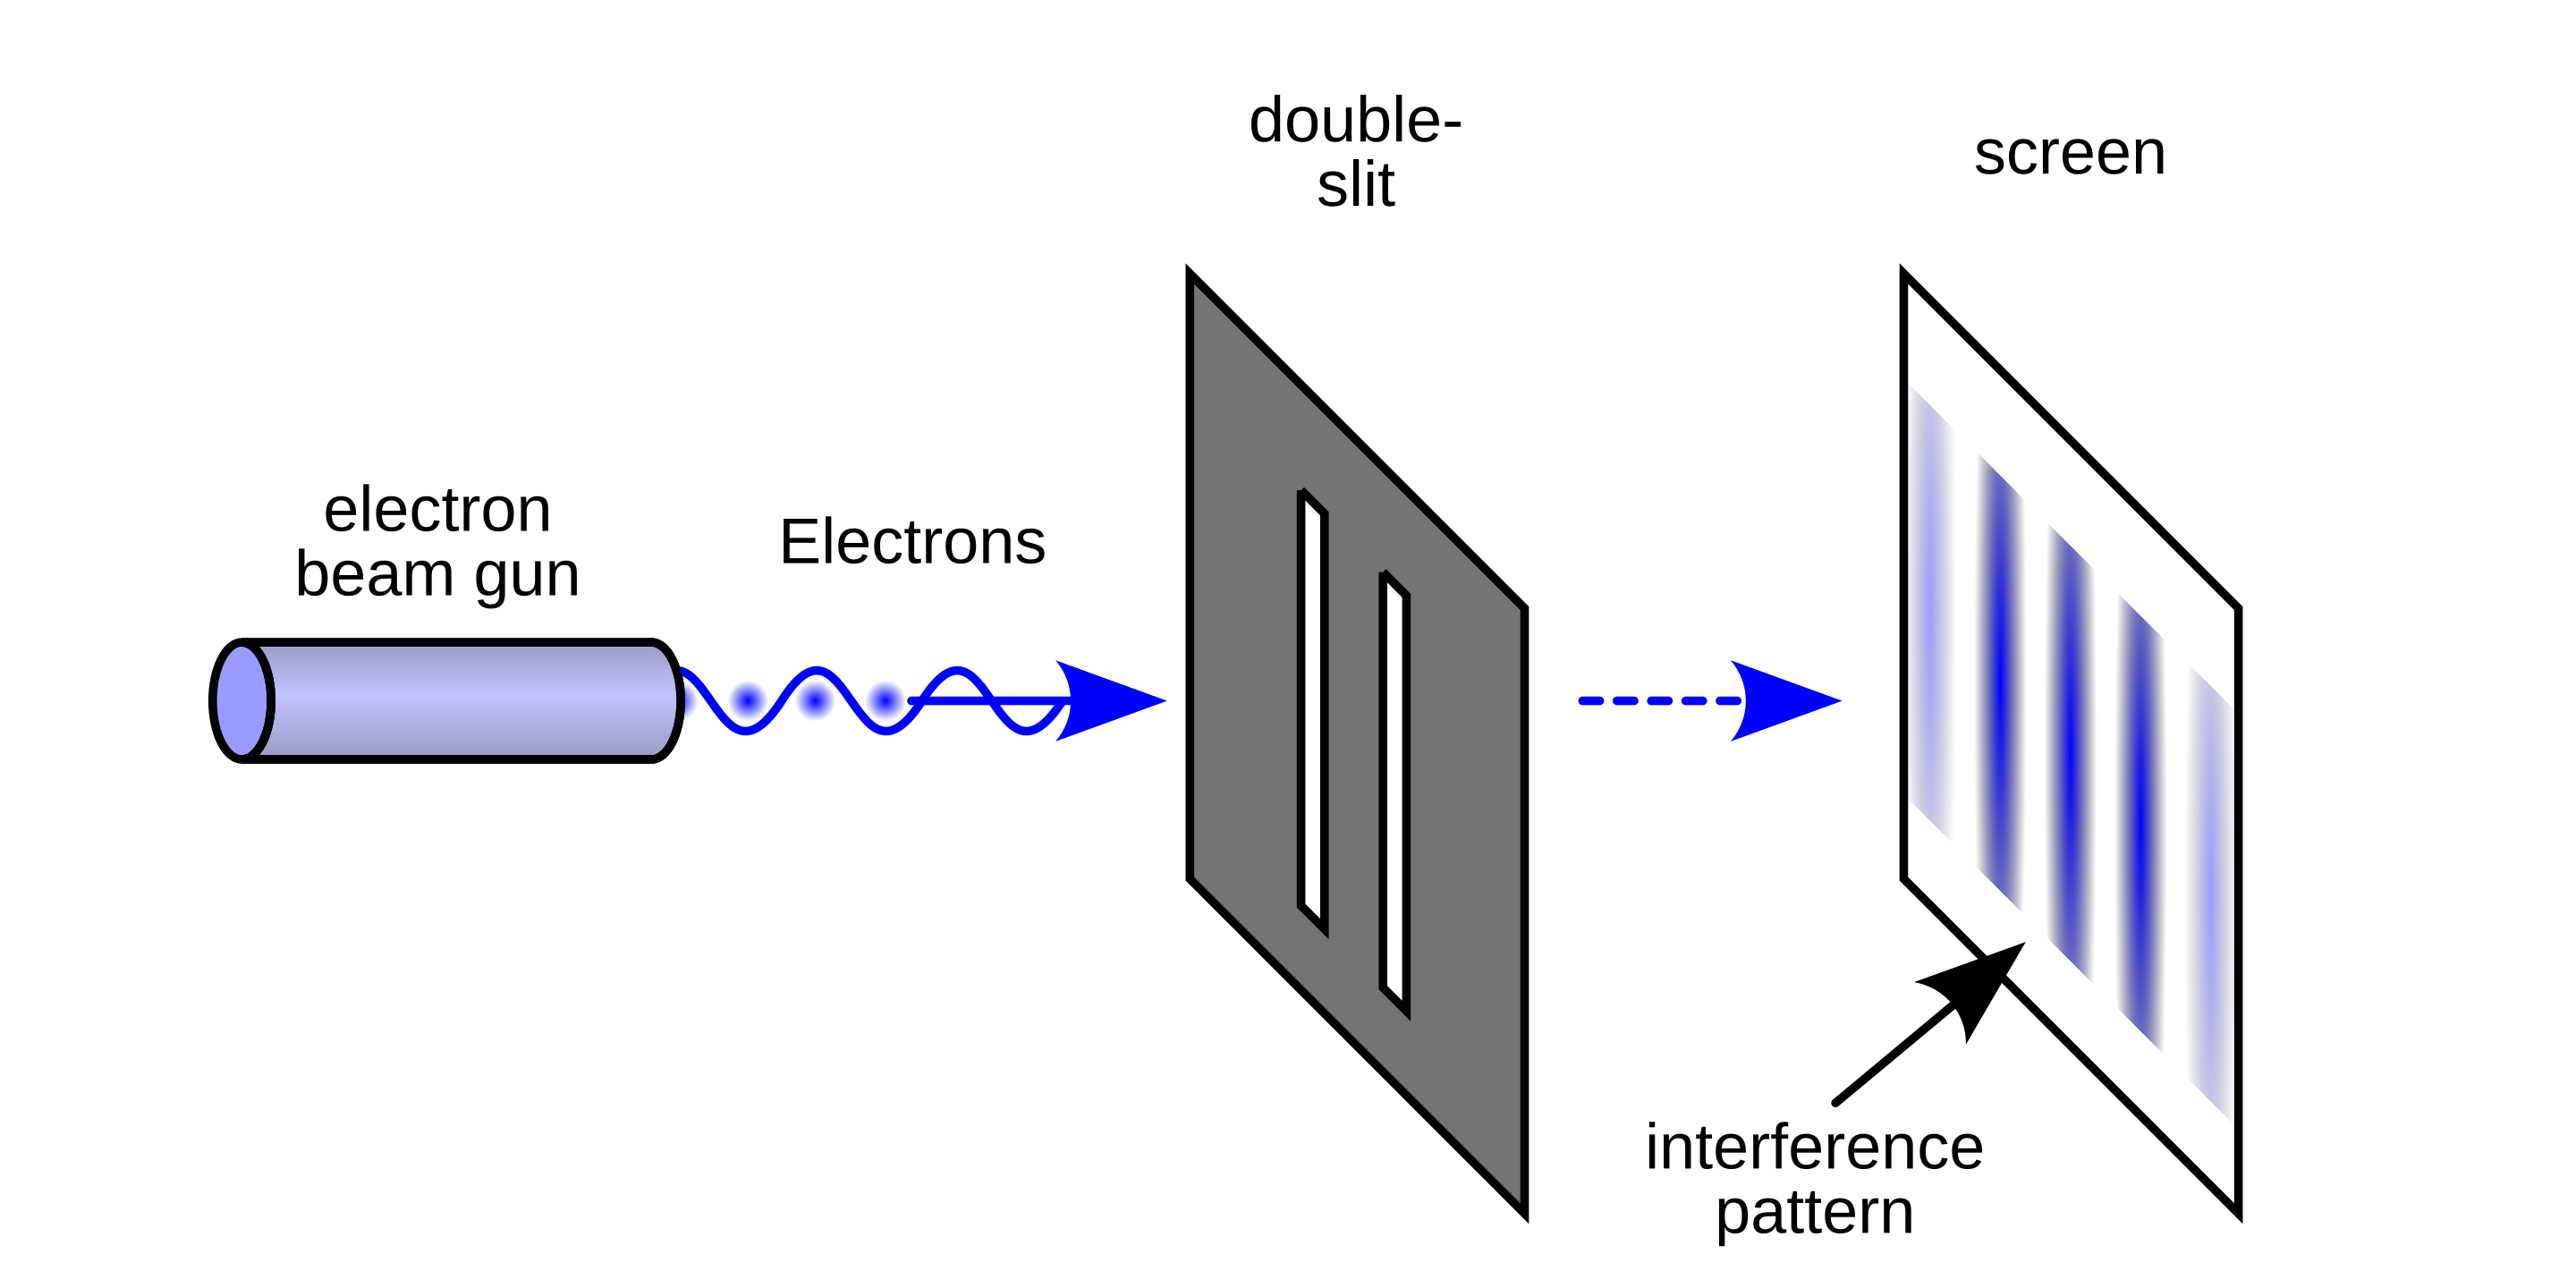
</p>
<p style="text-align:center;">
    image from wikipedia
</p>



In his paper **"Experiments and Calculations Relative to Physical Optics"** (1803), *Thomas Young* explains about his experiments in this quotation:
> I made a small hole in a window-shutter, and covered it with a piece of thick paper, which I perforated with a fine needle. For greater convenience of observation, I placed a small looking glass without the window-shutter, in such a positioned as to reflect the sun's light, in a direction nearly horizontal, upon the opposite wall, and to cause the cone of diverging light to pass over a table, on which were several little screens of card-paper. [\[1\]](https://royalsocietypublishing.org/doi/10.1098/rstl.1804.0001)

With this experiment, he could observe *beautiful fringe patterns by light* and explained *this comes from the differences in the lengths of the paths of two rays*. *George Thomson* later reproduced a similar experiment using *electrons* (**Electron Diffraction Experiment**), and showed that even *particles* like *electrons* *exhibit wave-like behavior*, as demonstrated in his 1927 paper. [\[2\]](https://www.nature.com/articles/119890a0) Later in 1965, *Richard Feynman* explained the **Double-Slit Experiment** in his **"Lectures on Physics, Vol. 3, Chapter 1"** [\[3\]](https://www.feynmanlectures.caltech.edu/III_toc.html), and explained *this comes from the* **Quantum Superposition** *and* **Quantum Interference** *concepts of* **Quantum Mechanics**.

Now, we can reproduce this fascinating **quantum phenomenon** using **Qiskits**, without complex physical equipment. Let's see how **Quantum Superposition** and **Quantum Interference** are implemented in **Quantum Circuits**.

The first step is mapping the physical **Douuble-Slit Experiment** to a **Quantum Circuit**, which is your first exercise.

<div class="alert alert-block alert-success">
<b>Exercise 1: Build a Quantum Circuit for the Double-Slit Experiment</b>

-   Exercise 1.1: Make a Double-Slit.

**Your Goal:** Create a **Quantum Circuit** that models a *particle* (qubit) passing through two slits, achieving a **Quantum Superposition** of being in the $|0\rangle$ (lower slit) and $|1\rangle$ (upper slit) states.

* Let's define the upper slit as the $|1\rangle$ state of a qubit and the lower slit as the $|0\rangle$ state;
* Implement a **Quantum Circuit** where a qubit, initially in $|0\rangle$, passes through the slits in a **Quantum Superposition** of $|0\rangle$ and $|1\rangle$ using the [Hadamard gate](https://quantum.cloud.ibm.com/docs/api/qiskit/qiskit.circuit.library.HGate). Draw your **Quantum Circuit**.

**Hint**: It can be beneficial for clarity to assign specific names to `QuantumRegister` (e.g., `name='q'`) and `ClassicalRegister` (e.g., `name='c_screen'`) when interpreting measurement data.

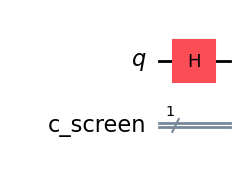

In [5]:
# Import the Quantum Circuit, Quantum Register,
# and Classical Register modules from the Qiskit library
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister


# Create a Quantum Register,
# with one quantum bit
qr = QuantumRegister(1, name = "q")

# Create a Classical Register for the screen,
# on which the Quantum Interference will be recorded,
# with one classical bit
cr = ClassicalRegister(1, name = "c_screen")

# Create a new Quantum Circuit
# to recreate the Double-Slit Experiment,
# with the Quantum Register and
# Classical Register defined before
double_slit = QuantumCircuit(qr, cr)


### WRITE YOUR CODE BELOW HERE ###

# Add a H (Hadamard) gate to qubit 0
double_slit.h(0)

### YOUR CODE FINISHES HERE    ###


# Return a drawing of the Quantum Circuit
# for the Double-Slit Experiment
# using the MatPlotLib library ("mpl")
double_slit.draw("mpl")

In [6]:
# Submit your answer for the exercise 1.1 of the lab 1,
# using the following code from the Grader
grade_lab1_ex1_1(double_slit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


<div class="alert alert-block alert-success">
<b>Exercise 1: Build a Quantum Circuit for the Double-Slit Experiment</b>

-   Exercise 1.2: Make a screen

**Your Goal:** Extend the previous **Quantum Circuit** to model the screen where **Quantum Interference** occurs. Specifically, implement the center of the screen where no phase difference is introduced, and then measure the qubit.

* Now, implement the screen where the two **superposed quantum states** create a **quantum interference pattern** by adding a gate;
* First, let's implement the center of the screen, where the two beams combine with no phase difference (resulting in the $|0\rangle$ state);
* Then, measure the qubit from `qr` and store the result in `c_screen`.

**Hint**: You can use the Hadamard gate again.
</div>

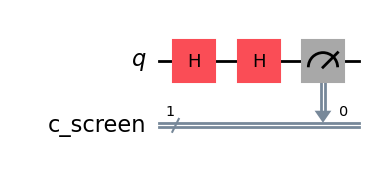

In [7]:
### WRITE YOUR CODE BELOW HERE ###

# Add a H (Hadamard) gate to qubit 0
double_slit.h(0)

# Add measurement operations to all qubits
double_slit.measure(qr, cr)

### YOUR CODE FINISHES HERE    ###


# Return a drawing of the Quantum Circuit
# for the Double-Slit Experiment
# using the MatPlotLib library ("mpl")
double_slit.draw("mpl")

In [8]:
# Submit your answer for the exercise 1.2 of the lab 1,
# using the following code from the Grader
grade_lab1_ex1_2(double_slit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


***

Let's check the execution result. Assuming the screen detects the qubit in the $|0\rangle$ state, the following code runs the **Quantum Circuit** on an ideal simulator. A probability of $1.0$ means $100$%.

<div class="alert alert-block alert-info">
<b>Note on Retrieving Measurement Results with SamplerV2</b> 

When using *SamplerV2* in **Qiskit**, how you retrieve measurement counts depends on how you have set up your **classical registers** and **Quantum Measurements**:

* 1.  Named **Classical Register** in **QuantumCircuit**:
    If you define your circuit with a named classical register, e.g., *cr = ClassicalRegister(1, name='my_results')* and *qc = QuantumCircuit(qr, cr)*, and then measure to it *qc.measure(qr[0], cr[0])*, you access the counts using that name:

    
    ```python
    # result = job.result()
    # counts = result[0].data.my_results.get_counts()
    ```
    
    In our double-slit circuit, we used *cr = ClassicalRegister(1, name='c_screen')*, so we will use *result[0].data.c_screen.get_counts()*.
<br><br>
* 2.  measure_all():
    If you use *qc.measure_all()*, Qiskit automatically adds classical bits and names the output data field `meas`:

    
    ```python
    # qc.measure_all()
    # ...
    # counts = result[0].data.meas.get_counts()
    ```
<br><br>
* 3.  Implicit Classical Bits (No Named Register in *QuantumCircuit*):
    If you create a circuit like *qc = QuantumCircuit(1, 1)* (1 qubit, 1 classical bit) or *qc = QuantumCircuit(QuantumRegister(1), ClassicalRegister(1))* without naming the classical register in its constructor, and then use *qc.measure(0, 0)*, the *SamplerV2* might store results under a default name (often *c*, or based on the classical bit indices like *c0*).
    For *qc = QuantumCircuit(1,1)* and *qc.measure(0,0)*, the output might be accessed as follows:

    ```python 
     # counts = result[0].data.c0.get_counts() # If single bit named c0, the indice can vary. You can see the actual indices when you plot your circuit.
    ```
</div>

***

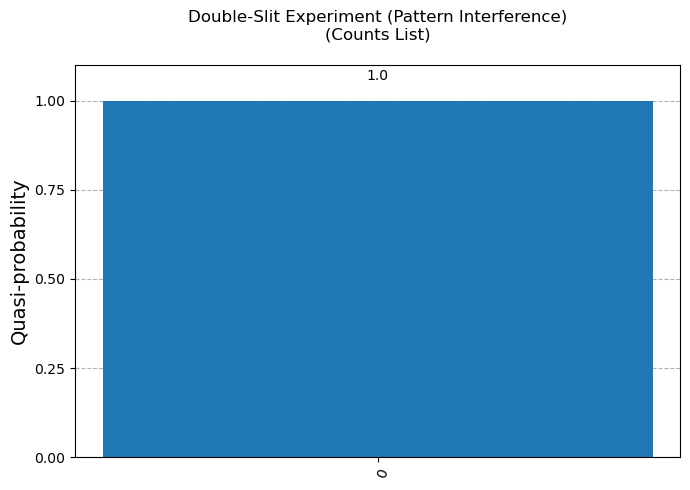

In [9]:
# Set up the Backend from the Qiskit Aer Simulator
backend = AerSimulator()

# Transpile the Quantum Circuit for the Backend defined before
# and with some optimization settings
pm = generate_preset_pass_manager(backend = backend,
                                  optimization_level = 3)

# Run and retrieve the Quantum Circuit transpiled
qc_isa = pm.run(double_slit)

# Set up the Sampler with the Backend defined before
sampler = Sampler(mode = backend)

# Submit the transpiled Quantum Circuit
# to the Sampler and execute it,
# retrieving the list of discrete counts of
# the measurements on the results from the Sampler
counts = sampler.run([qc_isa], shots = 1000)\
                .result()[0].data.c_screen.get_counts()

# Plot the probability distribution of
# the obtained list of discrete counts of
# the measurements on the results from the Sampler
plot_distribution(counts,
                  title = "Double-Slit Experiment (Pattern Interference)" + \
                          "\n(Counts List)\n")

***

<div class="alert alert-block alert-success">
<b>Exercise 1: Build a Quantum Circuit for the Double-Slit Experiment</b>

-   Exercise 1.3: Make a Difference

**Your Goal:** Modify the **Double-Slit** **Quantum Circuit** to introduce a **phase difference** between the two paths (slits) and observe its effect on the measurement outcome at the screen.

* Now, let's implement another part of the screen;
* The path difference between the two beams is implemented as a phase difference between $|0\rangle$ and $|1\rangle$;
* Apply a phase of $\pi/2$ only to the $|1\rangle$ state of the superposed quantum state and observe the measurement results.
    
**Hint:** Use a gate that applies a phase to the $|1\rangle$ state. The [**P gate**](https://quantum.cloud.ibm.com/docs/api/qiskit/qiskit.circuit.library.PhaseGate) and the [**S gate**](https://quantum.cloud.ibm.com/docs//api/qiskit/qiskit.circuit.library.SGate) are representative examples.
</div>

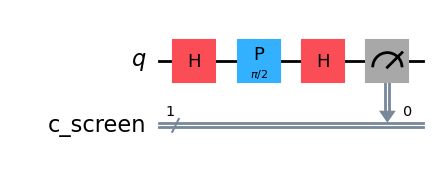

In [10]:
# Create a Quantum Register,
# with one quantum bit
qr = QuantumRegister(1, name = "q")

# Create a Classical Register for the screen,
# on which the Quantum Interference will be recorded,
# with one classical bit
cr = ClassicalRegister(1, name = "c_screen")

# Create a new Quantum Circuit
# to recreate the Double-Slit Experiment,
# with the Quantum Register and
# Classical Register defined before
double_slit_with_difference = QuantumCircuit(qr, cr)


# Add a H (Hadamard) gate to qubit 0
double_slit_with_difference.h(0)


### WRITE YOUR CODE BELOW HERE ###

# Add a P (Phase) gate with pi/2 radians to qubit 0
double_slit_with_difference.p(np.pi/2, 0)

### YOUR CODE FINISHES HERE    ###


# Add a H (Hadamard) gate to qubit 0
double_slit_with_difference.h(0)

# Add measurement operations to all qubits
double_slit_with_difference.measure(qr, cr)

# Return a drawing of the Quantum Circuit
# using the MatPlotLib library ("mpl")
double_slit_with_difference.draw("mpl")

In [11]:
# Submit your answer for the exercise 1.3 of the lab 1,
# using the following code from the Grader
grade_lab1_ex1_3(double_slit_with_difference)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


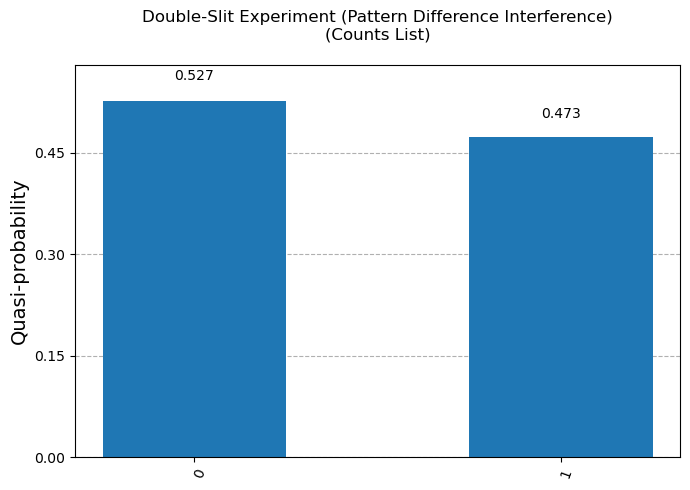

In [12]:
# Run and retrieve the Quantum Circuit transpiled
qc_isa = pm.run(double_slit_with_difference)

# Set up the Sampler with the Backend defined before
sampler = Sampler(mode = backend)

# Submit the transpiled Quantum Circuit
# to the Sampler and execute it,
# retrieving the list of discrete counts of
# the measurements on the results from the Sampler
counts = sampler.run([qc_isa], shots = 1000)\
                .result()[0].data.c_screen.get_counts()

# Plot the probability distribution of
# the obtained list of discrete counts of
# the measurements on the results from the Sampler
plot_distribution(counts,
                  title = "Double-Slit Experiment (Pattern Difference Interference)" + \
                          "\n(Counts List)\n")

As you can see, the probability of measuring $|0\rangle$ decreased to approximately 0.5 (50%), signifying reduced brightness at this point on the screen.

***

Before we go further, let's do a simple mathematics demonstration of this process in regards to **Quantum Superposition**, **Quantum Interference**, and the probability of measuring a **quantum state**. You can skip this part if you are already familiar with this concept.

***

<details>
<summary> <h3>Superposition, Interference and the Probability of Measurement </h3> <b>(Click to Expand)</b> </summary>

In our <b>Quantum Circuit</b> implementation of the <b>Double-Slit Experiment</b>, we used a sequence of <b>Hadamard (H)</b> gates and a <b>Phase (P)</b> gate. Let's break down the mathematical representation of the <b>quantum state</b> at each step and analyze the <b>Quantum Superposition</b>, <b>Quantum Interference</b>, and <b>measurement probability</b>.

**1. Initialization:**

We start with a single qubit initialized in the $|0\rangle$ state, representing the *electron* starting at a source before the slits:

$$ |\psi_0\rangle = |0\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix} $$

Here, we will assume $ |\psi_1\rangle$ is another **quantum state** that can pass the upper slit - this will be:

$$ |\psi_1\rangle = |1\rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix} $$

**2. Superposition (First Hadamard Gate):**

The first **Hadamard (H)** gate is applied to the qubit. This operation creates a **Quantum Superposition** of the $|0\rangle$ and $|1\rangle$ states, representing the *electron* passing through both slits simultaneously:

$$ H = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} $$

Applying **H** to $|\psi_0\rangle$:

$$ |\psi_1\rangle = H |\psi_0\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle) $$

This state $|\psi_1\rangle$ shows the qubit is in an equal **Quantum Superposition** of the $|0\rangle$ state (representing one slit) and the $|1\rangle$ state (representing the other slit).

**3. Phase Shift (P Gate):**

The **Phase (P)** gate introduces a **relative phase** $\phi$ between the $|0\rangle$ and $|1\rangle$ components of the **Quantum Superposition**. This **phase difference** corresponds to the path difference experienced by the *electron* waves passing through the two slits in the physical experiment. The **P** gate is defined as:

$$ P(\phi) = \begin{pmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{pmatrix} $$

Applying P($\phi$) to $|\psi_1\rangle$:

$$ |\psi_2\rangle = P(\phi) |\psi_1\rangle = \begin{pmatrix} 1 & 0 \\ 0 & e^{i\phi} \end{pmatrix} \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ e^{i\phi} \end{pmatrix} = \frac{1}{\sqrt{2}} (|0\rangle + e^{i\phi}|1\rangle) $$

The state $|\psi_2\rangle$ now contains the **relative phase** information, which is crucial for **Quantum Interference**.

**4. Interference (Second Hadamard Gate):**

The second **Hadamard (H)** gate is applied to bring the **quantum superposed states** back together, allowing them to interfere:

$$ |\psi_3\rangle = H |\psi_2\rangle = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ e^{i\phi} \end{pmatrix} = \frac{1}{2} \begin{pmatrix} 1 + e^{i\phi} \\ 1 - e^{i\phi} \end{pmatrix} $$

Expanding $e^{i\phi} = \cos(\phi) + i\sin(\phi)$:

$$ |\psi_3\rangle = \frac{1}{2} \begin{pmatrix} 1 + \cos(\phi) + i\sin(\phi) \\ 1 - (\cos(\phi) + i\sin(\phi)) \end{pmatrix} = \frac{1}{2} \begin{pmatrix} (1 + \cos(\phi)) + i\sin(\phi) \\ (1 - \cos(\phi)) - i\sin(\phi) \end{pmatrix} $$

This final **quantum state** before measurement embodies the interference effect, where the probabilities of measuring $|0\rangle$ or $|1\rangle$ depend on the **phase difference** $\phi$.

**5. Probability of Measurement:**

The probability of measuring the qubit in the $|0\rangle$ state (corresponding to one part of the screen) is given by the squared magnitude of the amplitude of $|0\rangle$ in $|\psi_3\rangle$:

$$ P(|0\rangle) = \left| \frac{1}{2} (1 + e^{i\phi}) \right|^2 = \left| \frac{1}{2} (1 + \cos(\phi) + i\sin(\phi)) \right|^2 $$

$$ P(|0\rangle) = \frac{1}{4} [(1 + \cos(\phi))^2 + (\sin(\phi))^2] = \frac{1}{4} [1 + 2\cos(\phi) + \cos^2(\phi) + \sin^2(\phi)] $$

Using the identity $\cos^2(\phi) + \sin^2(\phi) = 1$:

$$ P(|0\rangle) = \frac{1}{4} [1 + 2\cos(\phi) + 1] = \frac{1}{4} [2 + 2\cos(\phi)] = \frac{1}{2} (1 + \cos(\phi)) $$

In case of $\phi = \pi/2$, $P(|0\rangle) = \frac{1}{2} (1 + \cos(\pi/2)) = 0.5$, as we checked already.

</details>

***

Let's conclude Exercise 1 by generating the fringe pattern using a range of $\phi$.

<div class="alert alert-block alert-success">
<b>Exercise 1: Build a Quantum Circuit for the Double-Slit Experiment</b>

-   Exercise 1.4: Beautiful Fringes

**Your Goal:** Create a **Parameterized Quantum Circuit (PQC)** where the **phase difference** $\phi$ can be varied, allowing you to simulate and visualize the **complete interference fringe pattern**.

* **Qiskit** allows [using `Parameters` in **Quantum Circuits**](https://quantum.cloud.ibm.com/docs/api/qiskit/qiskit.circuit.Parameter);
* We will use this with the `Sampler` to observe interference fringes;
* Define a **Parameterized Quantum Circuit (PQC)** for the **Double-Slit Experiment** with a variable parameter $\phi$;
* A common structure is **H** gate, then **P**$(\phi)$ gate, then another **H** gate, before measurement;
* Measure `q` and save to `c_screen`.
</div>

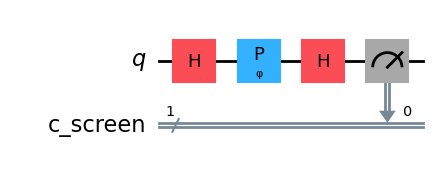

In [13]:
# Define the phi parameter
φ = Parameter("φ")


# Create a Quantum Register,
# with one quantum bit
qr = QuantumRegister(1, name = "q")

# Create a Classical Register for the screen,
# on which the Quantum Interference will be recorded,
# with one classical bit
cr = ClassicalRegister(1, name = "c_screen")

# Create a new Quantum Circuit
# to recreate the Double-Slit Experiment,
# with the Quantum Register and
# Classical Register defined before
double_slit_fringe = QuantumCircuit(qr, cr)


### WRITE YOUR CODE BELOW HERE ###

# Add a H (Hadamard) gate to qubit 0
double_slit_fringe.h(0)

# Add a parameterized P (Phase) gate to qubit 0
double_slit_fringe.p(φ, 0)

# Add a H (Hadamard) gate to qubit 0
double_slit_fringe.h(0)

# Add measurement operations to all qubits
double_slit_fringe.measure(qr, cr)

### YOUR CODE FINISHES HERE    ###


# Return a drawing of the Quantum Circuit
# using the MatPlotLib library ("mpl")
double_slit_fringe.draw("mpl")

In [14]:
# Submit your answer for the exercise 1.4 of the lab 1,
# using the following code from the Grader
grade_lab1_ex1_4(double_slit_fringe)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


***

Excellent! Now, let's use this **Parameterized Quantum Circuit (PQC)** to plot the **fringe pattern** using **MatPlotLib**'s **Heat Map**. The code below generates 100 **phase values**, runs the **Quantum Circuits** (1000 shots each) via `Sampler`, stores the probability of measuring $|0\rangle$, and plots the **Heat Map**.

***

<div class="alert alert-block alert-warning">
<b>Resource Limit:</b>

* When running the code below on an actual backend, increasing the number of parameters or shots consumes more **QPU** time than might be expected;
* The current configuration (100 **Parameterized Quantum Circuit (PQC)** + 1000 shots) uses less than 1 minute of **QPU** time, so please try to maintain these settings if possible.

</div>

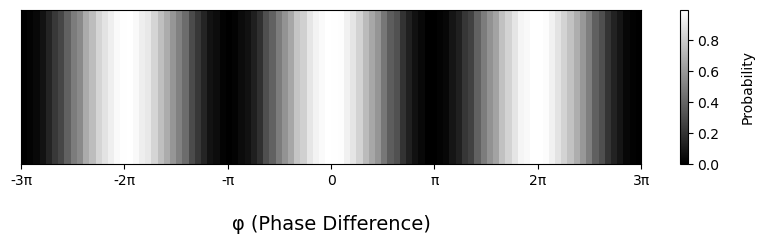

In [15]:
# Define a list for variable phi values
# from a linear space of 100 points within [-3pi,3pi]
φ_lst = np.linspace(-3 * np.pi, 3 * np.pi, 100)

# Run and retrieve the Quantum Circuit transpiled
qc_isa = pm.run(double_slit_fringe)


# Define a list of hits on the screen
# for the list of variable phi values
φ_hit = []

# Submit the transpiled Quantum Circuit
# to the Sampler and execute it,
# retrieving the measurements
# on the results from the Sampler
dist = sampler.run([(qc_isa, φ_lst)], shots = 1000)\
              .result()[0].data.c_screen


# For every index of variable phi values
for i in range(len(φ_lst)):
    
    # Retrieve the discrete counts
    # from the current variable phi value
    result = dist[i].get_counts()
    
    # If current variable phi value
    # results on a hit on the screen
    if "0" in result:
        
        # Append a probability of 1.0 (100%) to
        # the respective variable phi value
        φ_hit.append(result["0"] / 1000)
    
    # If current variable phi value
    # does not result on a hit on the screen
    else:
        
        # Append a probability of 0.0 (0%) to
        # the respective variable phi value
        φ_hit.append(0)

        
# Define a two-dimensional heat map
# for the resulting hits on the screen
# regarding the variable phi values
φ_hit_2d = np.array(φ_hit).reshape(1, -1)


# Create a figure for plotting
plt.figure(figsize = (10, 2))

# Define the plot for the two-dimensional
# heat map for the resulting hits on the screen
# regarding the variable phi values
plt.imshow(φ_hit_2d, cmap = "gray", aspect = "auto",
           extent = [-3 * np.pi, 3 * np.pi, 0, 0.1])

# Define the label for the x-axis of the heat map plot
plt.xlabel("\nφ (Phase Difference)", fontsize = 14)

# Define the label for the color of bars
plt.colorbar(label = "\nProbability")

# Define the ticks for the x-axis
plt.xticks(ticks = [-3 * np.pi, -2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi, 3 * np.pi],
           labels = ["-3π", "-2π", "-π", "0", "π", "2π", "3π"])

# Clear the ticks for the y-axis
plt.yticks([])  


# Show the heat map plot for the hits on the screen,
# representing the fringe pattern of the Double-Slit Experiment
plt.show()

Fantastic! You've reproduced the **Double-Slit Experiment**'s fringes using qubits. Next, we'll explore **Quantum Measurement** with **Schrödinger's Cat Experiment**, and then, see how observation affects the **Double-Slit Experiment**'s outcome.

***

## Schrödinger’s Cat Experiment and Double-Slit Revisit
<a id="schrodinger-cat-experiment-double-slit-revisit"></a>

This thought experiment by *Erwin Schrödinger* in 1935 [\[4\]](https://link.springer.com/article/10.1007/BF01491891), illustrates **Quantum Superposition** and **Quantum Measurement**'s role in collapsing possibilities into a single outcome. *A cat is sealed in a box with a radioactive atom*. *If the atom is in a* **Quantum Superposition** *of decayed/not decayed, the cat,* **entangled** *with it, should be in a* **Quantum Superposition** *of alive/dead until observed*.

Here, we will use a rotational gate. Imagine a cat disliking the $|1\rangle$ state. Let's see if the cat is happy or upset when we "open the box" (measure the qubit). Be careful! An angry quantum cat might scratch you.

<div class="alert alert-block alert-success">
<b>Exercise 2: Is the cat happy or grumpy?</b>

**Your Goal:** Create a **Quantum Circuit** that prepares a qubit in a **Quantum Superposition** state using an $R_X(\theta)$ gate, then simulate a single **Quantum Measurement** to determine if the "cat" (represented by the qubit state) is "happy" ($|0\rangle$) or "grumpy" ($|1\rangle$).

* Complete the **Python** code below using the [**Rotational X** gate](https://quantum.cloud.ibm.com/docs/api/qiskit/qiskit.circuit.library.RXGate) with $\theta \in [0, 2\pi]$ to prepare a qubit in various **Quantum Superposition** states;
* Then, measure once to see if the cat is happy ($|0\rangle$) or grumpy ($|1\rangle$);
* $\theta$ will be given to you by the slider.
</div>

In [16]:
# The function for the setup of the Schrödinger's Cat Experiment,
# with a Parameterized Quantum Circuit (PQC) based on a theta value
def schrodingers_cat_experiment_theta(theta):
    
    # Create a new Quantum Circuit with one qubits,
    # to recreate the Schrödinger's Cat Experiment
    qc = QuantumCircuit(1)

    
    ### WRITE YOUR CODE BELOW HERE ###

    # Add a RX(theta) (Rotational X) gate to qubit 0
    qc.rx(theta, 0)
    
    ### YOUR CODE FINISHES HERE    ###
    
    
    # Add measurement operations to all qubits
    qc.measure_all()
    
    
    # Set up the Backend from the Qiskit Aer Simulator
    backend = AerSimulator()
    
    # Transpile the Quantum Circuit for the Backend defined before
    # and with some optimization settings
    pm = generate_preset_pass_manager(backend = backend,
                                      optimization_level = 3)
    
    # Run and retrieve the Quantum Circuit transpiled
    qc_isa = pm.run(qc)
    
    # Set up the Sampler with the Backend defined before
    sampler = Sampler(mode = backend)
    
    # Submit the transpiled Quantum Circuit
    # to the Sampler and execute it,
    # retrieving the corresponding job,
    # retrieving as well the list of discrete counts of
    # the measurements on the results from the Sampler
    counts = sampler.run([qc_isa], shots = 1).result()[0].data.meas.get_counts()
    
    
    # Retrieve the outcome of the measured quantum state
    measured_state = list(counts.keys())[0] if counts else "0"

    
    # If the measured quantum state,
    # results in the outcome 0
    if measured_state == "0":
      
        # Set the boolean flag determining
        # if the cat is happy or not, as True
        cat_happy = True
    
    # If the measured quantum state,
    # results in the outcome 1
    else:
         
        # Set the boolean flag determining
        # if the cat is happy or not, as False
        cat_happy = False
    
    
    # Return the boolean flag determining
    # if the cat is happy or not, as well as
    # the respective Quantum Circuit for
    # the Schrödinger's Cat Experiment
    return cat_happy, qc

In [17]:
# Submit your answer for the exercise 2 of the lab 1,
# using the following code from the Grader
grade_lab1_ex2(schrodingers_cat_experiment_theta)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


***

Now, use the widget below to check the cat's mood. Make sure `cat-happy.png` and `cat-grumpy.png` are in the **resources** folder. (Image credit: *James Weaver*)

In [18]:
# Set the image for the happy cat
happy_img = Image.open("resources/cat-happy.png")

# Set the image for the grumpy cat
grumpy_img = Image.open("resources/cat-grumpy.png")

In [19]:
# Return the output for Widgets
out = widgets.Output()

In [20]:
# Create a Float Slider Widget for
# the Schrödinger's Cat Experiment
slider = widgets.FloatSlider\
(
    value = 0,
    min = 0,
    max = 2 * np.pi,
    step = 0.01,
    description = "θ: ",
    continuous_update = True
)

In [21]:
# Create a Button Widget for
# the Schrödinger's Cat Experiment
button = widgets.Button\
(
    description = "Open the Box",
    button_style = "Success"
)

In [22]:
# The function for the setup of on click behavior of
# the  Button Widget of the graphic setup for
# the Schrödinger's Cat Experiment
def on_button_click(b):
    
    # Within the context of output for Widgets
    with out:
        
        # Clean the output for Widgets
        out.clear_output(wait = True)
        
        # Retrieve the outcome of the measured quantum state,
        # based on the value obtained from the Float Slider Widget
        result = schrodingers_cat_experiment_theta(slider.value)[0]
        
        
        # If the boolean flag determining if the cat is happy or not,
        # obtained from the Schrödinger's Cat Experiment,
        # with a Parameterized Quantum Circuit (PQC)
        # based on a theta value, is true
        if result == True:
            
            # Defines the image representing
            # the state of the cat as being happy
            img = happy_img
            
            # Defines the text representing
            # the state of the cat as being happy
            state_text = "happy"
            
        # If the boolean flag determining if the cat is happy or not,
        # obtained from the Schrödinger's Cat Experiment,
        # with a Parameterized Quantum Circuit (PQC)
        # based on a theta value, is false
        else:
            
            # Defines the image representing
            # the state of the cat as being grumpy
            img = grumpy_img
            
            # Defines the text representing
            # the state of the cat as being grumpy
            state_text = "grumpy"
        
        
        # Define the new size for the image
        # representing the state of the cat
        new_size = (400, 400)
        
        # Resize the image representing
        # the state of the cat with the new size
        resized_img = img.resize(new_size)
        
        
        # Create an I/O buffer
        buf = io.BytesIO()
        
        # Save the image representing
        # the state of the cat as a PNG file
        resized_img.save(buf, format = "PNG")
        
        # Seek the beginning of the I/O buffer
        buf.seek(0)
        
        
        # Compute the probability value according to
        # the theta value obtained from the Float Slider Widget
        probability = int(np.cos(slider.value / 2)**2 * 100)
        
        
        # Print the probability of the cat being happy
        display(f"The probability of cat is happy: {probability}%")
    
        # Display the text representing
        # the state of the cat
        display(f"The observed cat is: |{txt}⟩")
        
        # Display the image representing
        # the state of the cat, obtained from the buffer
        display(widgets.Image(value = buf.read(),
                              format = "png"))

In [23]:
# Define the Button Widget's on click function
button.on_click(on_button_click)

In [24]:
# Define and show the graphic setup for
# the Schrödinger's Cat Experiment
print("\033[1m Schrödinger's Cat Experiment \n \033[0m\n\n")
print("       Move the Slider for the Theta Value")
display(slider)
print()
display(button, out)

 Schrödinger's Cat Experiment 
 


       Move the Slider for the Theta Value


FloatSlider(value=0.0, description='θ: ', max=6.283185307179586, step=0.01)

Button(button_style='success', description='Open the Box', style=ButtonStyle())

Output()

***

Before we revisit the double-slit experiment, let's clarify what happens when we try to observe or "measure" a qubit, especially after applying a gate like $R_x(\theta)$. If you are familiar with quantum measurement, you can skip this part.

***

<details>
<summary> <h3>Quantum Measurement Details: Observing the Qubit </h3> <b>(Click to Expand)</b> </summary>

**1. Qubit State Before Measurement:**
After $R_x(\theta)$ on $|0\rangle$, the **quantum state** is a **Quantum Superposition**:
$$|\psi\rangle = R_x(\theta)|0\rangle = \cos\left(\frac{\theta}{2}\right)|0\rangle - i \sin\left(\frac{\theta}{2}\right)|1\rangle = \alpha|0\rangle + \beta|1\rangle$$
where $|\alpha|^2 + |\beta|^2 = 1$.

**2. Act of Measurement:**
**Quantum Measurement** in the computational basis ($\{|0\rangle, |1\rangle\}$) forces the qubit to choose one **quantum state**. The **Quantum Superposition** is not directly observable.

**3. Probabilistic Outcomes:**
* Probability of measuring $|0\rangle$: $P(0) = |\alpha|^2 = \cos^2\left(\frac{\theta}{2}\right)$
* Probability of measuring $|1\rangle$: $P(1) = |\beta|^2 = \sin^2\left(\frac{\theta}{2}\right)$

**4. State Collapse:**
Post-measurement, the **quantum state** collapses:
* If '0' is measured $\rightarrow$ state becomes $|0\rangle$.
* If '1' is measured $\rightarrow$ state becomes $|1\rangle$.
    
This "collapse" effect destroys the **Quantum Superposition**.

**Connection to the Double-Slit Experiment:**
Detecting which slit a *particle* uses is a **Quantum Measurement**. It collapses the *particle*'s wave function to a definite path, destroying the **Quantum Superposition** needed for **interference fringes**.
</details>

***

Now, let's revisit the **Double-Slit Experiment**.

***

## Double-Slit Experiment with Measurement

<div class="alert alert-block alert-success">
<b>Exercise 3: Double-slit with a path detector</b>

**Your Goal:** Construct a **Double-Slit Quantum Circuit** that includes an intermediate measurement acting as a "which-path" detector. This will allow you to observe how acquiring information about the particle's path affects the final interference pattern.

* Modify the **Double-Slit Quantum Circuit** to include a "which-path" detector (a **Quantum Measurement** after the first **H** gate).

Setup:
* `qr`: 1 qubit (`'q'`);
* `cr1`: 1 classical bit (`'c_detector'`) for path detection;
* `cr2`: 1 classical bit (`'c_screen'`) for final **Quantum Measurement**;
* `φ`: A `Parameter` for the **P (Phase)** gate.

**Hint**: Your **Quantum Circuit** will have two **Quantum Measurements**.
</div>

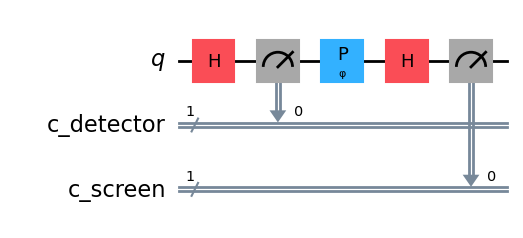

In [25]:
# Create a Quantum Register,
# with one quantum bit
qr = QuantumRegister(1, name = "q")

# Create a Classical Register for the path detection,
# with one classical bit
cr1 = ClassicalRegister(1, name = "c_detector")

# Create a Classical Register for the screen,
# on which the Quantum Interference will be recorded,
# with one classical bit
cr2 = ClassicalRegister(1, name = "c_screen")

# Create a new Quantum Circuit
# to recreate the Double-Slit
# Experiment with Detectors,
# with the Quantum Register and
# Classical Register defined before
double_slit_with_detector = QuantumCircuit(qr, cr1, cr2)


# Define the phi parameter
φ = Parameter("φ")


### WRITE YOUR CODE BELOW HERE ###

# Add a H (Hadamard) gate to qubit 0
double_slit_with_detector.h(0)

# Add measurement operations to all qubits,
# for the "which-path" detector
double_slit_with_detector.measure(qr, cr1)

# Add a parameterized P (Phase) gate to qubit 0
double_slit_with_detector.p(φ, 0)

# Add a H (Hadamard) gate to qubit 0
double_slit_with_detector.h(0)

# Add measurement operations to all qubits,
# for the screen hit recording
double_slit_with_detector.measure(qr, cr2)

### YOUR CODE FINISHES HERE    ###


# Return a drawing of the Quantum Circuit
# for the Double-Slit Experiment
# using the MatPlotLib library ("mpl")
double_slit_with_detector.draw("mpl")

In [26]:
# Submit your answer for the exercise 3 of the lab 1,
# using the following code from the Grader
grade_lab1_ex3(double_slit_with_detector)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


***

Now, repeat the **heat map** generation to see the new **fringe pattern** with the **detector**.

**Warning**: This can take minutes...

***

<div class="alert alert-block alert-warning">
<b>Resource Limit:</b>

* When running the code below on an actual backend, increasing the number of parameters or shots consumes more **QPU** time than might be expected;
* The current configuration (100 **Parameterized Quantum Circuit (PQC)** + 1000 shots) uses less than 1 minute of **QPU** time, so please try to maintain these settings if possible.

</div>

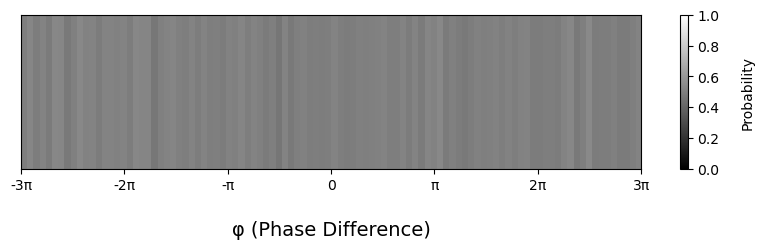

In [27]:
# Define a list for variable phi values
# from a linear space of 100 points within [-3pi,3pi]
φ_lst = np.linspace(-3 * np.pi, 3 * np.pi, 100)

# Run and retrieve the Quantum Circuit transpiled
qc_isa = pm.run(double_slit_with_detector)


# Define a list of hits on the screen
# for the list of variable phi values
φ_hit = []

# Submit the transpiled Quantum Circuit
# to the Sampler and execute it,
# retrieving the measurements
# on the results from the Sampler
dist = sampler.run([(qc_isa, φ_lst)], shots = 1000)\
              .result()[0].data.c_screen


# For every index of variable phi values
for i in range(len(φ_lst)):
    
    # Retrieve the discrete counts
    # from the current variable phi value
    result = dist[i].get_counts()
    
    # If current variable phi value
    # results on a hit on the screen
    if "0" in result:
        
        # Append a probability of 1.0 (100%) to
        # the respective variable phi value
        φ_hit.append(result["0"] / 1000)
    
    # If current variable phi value
    # does not result on a hit on the screen
    else:
        
        # Append a probability of 0.0 (0%) to
        # the respective variable phi value
        φ_hit.append(0)

        
# Define a two-dimensional heat map
# for the resulting hits on the screen
# regarding the variable phi values
φ_hit_2d = np.array(φ_hit).reshape(1, -1)


# Create a figure for plotting
plt.figure(figsize = (10, 2))

# Define the plot for the two-dimensional
# heat map for the resulting hits on the screen
# regarding the variable phi values
plt.imshow(φ_hit_2d, cmap = "gray", aspect = "auto",
           extent = [-3 * np.pi, 3 * np.pi, 0, 0.1],
           vmin = 0, vmax = 1)

# Define the label for the x-axis of the heat map plot
plt.xlabel("\nφ (Phase Difference)", fontsize = 14)

# Define the label for the color of bars
plt.colorbar(label = "\nProbability")

# Define the ticks for the x-axis
plt.xticks(ticks = [-3 * np.pi, -2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi, 3 * np.pi],
           labels = ["-3π", "-2π", "-π", "0", "π", "2π", "3π"])

# Clear the ticks for the y-axis
plt.yticks([])

# Show the heat map plot for the hits on the screen,
# representing the fringe pattern of the Double-Slit Experiment
plt.show()

***

You should see a mostly gray pattern, indicating roughly 50% probability of measuring $|0\rangle$ regardless of $\phi$. The **Quantum Interference** **fringes** have vanished!

*** 

<details> 
<summary> <h3>Look Into How Detector Works</h3> <b>(Click to Expand)</b> </summary>

1.  **Initial State**: $|\psi_0\rangle = |0\rangle$
    <br><br>
2.  **First Hadamard (H) gate**: $|\psi_1\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$ (particle can pass through both slits)
    <br><br>
3.  **First Measurement (Detector)**: Collapses the **Quantum Superposition**.
    * Outcome 0 (prob 1/2) $\rightarrow |\psi_{2a}\rangle = |0\rangle$
    * Outcome 1 (prob 1/2) $\rightarrow |\psi_{2b}\rangle = |1\rangle$
    
    The qubit is now in a definite **quantum state**.
    <br><br>
4.  **Phase (P) gate**:
    * If outcome 0: $|\psi_{3a}\rangle = P(\phi)|0\rangle = |0\rangle$
    * If outcome 1: $|\psi_{3b}\rangle = P(\phi)|1\rangle = e^{i\phi}|1\rangle$
    
    The phase $\phi$ *cannot act* as a **relative phase** for **Quantum Interference** due to the collapse.
    <br><br>
5.  **Second Hadamard (H) gate**:
    * If outcome 0: $|\psi_{4a}\rangle = H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$
    * If outcome 1: $|\psi_{4b}\rangle = H(e^{i\phi}|1\rangle) = e^{i\phi} \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$
    <br><br>
6.  **Second Measurement (Screen)**:
    * If first measurement was 0: Prob(final '0') = 1/2, Prob(final '1') = 1/2.
    * If first measurement was 1: Prob(final '0') = 1/2, Prob(final '1') = 1/2.

**Conclusion**: Regardless of the detector's outcome, the final **Quantum Measurement** is always 50/50 for $|0\rangle$ or $|1\rangle$. The intermediate **Quantum Measurement** destroyed the **Quantum Superposition**, and thus the **Quantum Interference**. This demonstrates that "which-path" information destroys **Quantum Interference**.
</details>

***

So far, we have explored **Quantum Superposition**, **Quantum Interference**, and **Quantum Measurement**. Now, let's dive into another profound **quantum phenomenon**: **Quantum Entanglement**.

***

# Chapter 2: Quantum Entanglement
<a id="entanglement"></a>

**Quantum Entanglement** is a **quantum phenomenon** where *particles* become interconnected, sharing a **quantum state** that links their properties, no matter how far apart they are. Measuring one *particle*'s **quantum state** instantly reveals information about the **quantum state** of the other. *Albert Einstein* called this *“spooky action at a distance”*.

In 1964, *John Bell* proposed **Bell’s Inequality** to test if **quantum entangled** *particles* behave classically. The **Clauser–Horne–Shimony–Holt (CHSH) Experiment** provided a concrete test. **Quantum Mechanics** *passed*, *defying classical expectations*. [\[5\]](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.23.880) In 1997, **Quantum Teleportation** — *transferring a* **quantum state** *without moving the particle* — was achieved using **Quantum Entanglement**. [\[6\]](https://www.nature.com/articles/37539)

With **Qiskit**, let's try the **CHSH Experiment** and **Quantum Teleportation**.

***

## The Curious Case of Alice, Bob, and the Unbeatable Game - Clauser–Horne–Shimony–Holt (CHSH) Game
<a id="case-alice-bob-unbeatable-chsh-game"></a>

*Alice* and *Bob* are *far apart* and *cannot communicate*. A *Referee* gives them a challenge:
1.  *Referee* picks two bits (`x`, `y`), sends `x` to *Alice*, `y` to *Bob*;
2.  *Alice* and *Bob* instantly reply with their bits (`a`, `b`);
3.  **Win Condition**: `a XOR b == x AND y`.

They want a pre-agreed strategy to maximize their average win rate.

**Your Goal**: Implement the **Quantum Strategy** for the **CHSH game** using **Qiskit**, simulate its performance, and compare it to the *classical limit* to understand the advantage provided by **Quantum Entanglement**.

***

<div class="alert alert-block alert-info">
<b>For Your In-Depth Study</b>

* For a more in-depth explanation and exploration of **Quantum Entanglement** in action, including the **CHSH game**, you can refer to the **Qiskit** learning resource: [**Entanglement in Action**](https://quantum.cloud.ibm.com/learning/courses/basics-of-quantum-information/entanglement-in-action/introduction).
</div>

***

### The Classical Limit: Why 75% is the Barrier

Let's first think *classically*. Since *Alice* and *Bob* *cannot communicate after receiving* `x` *and* `y`, *Alice*'s *output* `a` *can only depend on* `x`, and *Bob*'s *output* `b` *can only depend on* `y`. *They could pre-agree on a (classical) strategy, even a random one, but it boils down to local choices*.

Winning condition means:
* Inputs (0,0), (0,1), or (1,0): Win if `a == b`;
* Input (1,1): Win if `a != b`.

Can you find a fixed (classical) strategy (like `a = 0, b = 0` or `a = x, b = y`) that wins more than 3 out of the 4 possible input cases? Try it! You will find the maximum average win rate is stubbornly stuck at **75%**, a *fundamental limit of* **local realism**.

***

### The Quantum Strategy: Quantum Entanglement to the Rescue!

What if *Alice* and Bob prepared something special *before* the **CHSH game**? What if they shared a pair of **quantum entangled** qubits? Imagine **Quantum Entanglement** like two "magic" coins that are mysteriously linked. Even miles apart, measuring one *instantly influences* the *correlations* you will find when measuring the other. *They do not send messages faster than light, but their fates are intertwined*.

Specifically, they share a [**Bell State**](https://en.wikipedia.org/wiki/Bell_state): $(|00\rangle + |11\rangle) / \sqrt(2)$.

If they both measure their qubit in the *same* way, they always get the same result (both $0$ or both $1$).

The **Quantum Strategy**: Instead of outputting *fixed* bits, *Alice* and *Bob* use their input (`x` or `y`) to decide *how* to measure their shared qubit.
1.  **Shared Resource**: *Alice* holds qubit 0, Bob holds qubit 1 of their entangled pair.
2.  Measurement Choice (The Clever Part):
    *   Alice (input `x`): Measures along angle 0 (standard Z basis) if `x=0`, or angle π/2 (X basis) if `x=1`.
    *   Bob (input `y`): Measures along angle -π/4 if `y=0`, or angle π/4 if `y=1`, by using `Ry` gate.
3.  Output: They output the result of their respective measurements as `a` and `b`.

These specific angles are crucial! They exploit the unique correlations of the Bell state to maximize their chances of satisfying `a XOR b == x AND y` across all input pairs.

Let's build the **Quantum Circuit** for this **Quantum Strategy**.

*Alice* and *Bob* share a **quantum entangled** qubit pair in the **Bell State**: $(|00\rangle + |11\rangle) / \sqrt{2}$. If measured the same way, they always get the same result.

***

**Note**

* For detailed information on the **Quantum Circuit**'s configuration, its operational flow, or the underlying principles, please refer to [this lesson](https://quantum.cloud.ibm.com/learning/courses/basics-of-quantum-information/entanglement-in-action/chsh-game) in the **IBM Quantum Learning** course, **Basics of Quantum Information**.

***

### Qiskit Implementation: Building the Quantum Circuit

<div class="alert alert-block alert-success">
<b>Exercise 4: Quantum Circuit for CHSH Game</b>

**Your Goal:** Define a function `create_chsh_circuit(x, y)` by constructing the **Quantum Circuit** that *Alice* and *Bob* will use for their **Quantum Strategy** in the **CHSH game**. This involves preparing a **quantum entangled** **Bell State**, and then, applying measurement basis rotations based on their respective inputs.

**Tasks:**
* **Task 1:** Create the **Bell State** $(|00\rangle + |11\rangle) / \sqrt{2}$;
* **Task 2:** Implement *Bob*'s rotation based on his input `y`.
</div>

In [28]:
# The function to create the Quantum Circuit for
# the Bell State to win the Clauser–Horne–Shimony–Holt (CHSH) game,
# based on the input pair (x,y) for the Quantum Strategy
def create_chsh_circuit(x, y):
    
    # Create a new Quantum Circuit with
    # two qubits, to generate a Bell State to win
    # the Clauser–Horne–Shimony–Holt (CHSH) game,
    # based on the input pair (x,y) for the Quantum Strategy
    qc = QuantumCircuit(2, 2, name = f"CHSH_{x}{y}")
    
    
    ### WRITE YOUR CODE BELOW HERE ###
    
    # Task 1/Step 1 - Implement the gates to create
    #                 the Bell State |Φ+> = (|00> + |11>)/sqrt(2)
    
    # Add a H (Hadamard) gate to qubit 0
    qc.h(0)

    # Add a CNOT (Controlled-Not) gate to
    # qubits 0 (control) and 1 (target)
    qc.cx(0, 1)

    ### YOUR CODE FINISHES HERE    ###
    
    
    # Add a barrier to all qubits
    qc.barrier()
    
    
    # Step 2a: Implement Alice's measurement basis
    #          (X if x=1, Z if x=0)
    
    # If Alice's input value is 1
    if x == 1:
        
        # Add a H (Hadamard) gate to qubit 0
        qc.h(0)
    
    
    ### WRITE YOUR CODE BELOW HERE ###

    # Task 2/Step 2b: Implement Bob's measurement basis
    #                 (Ry(pi/4) if y=1, RY(-pi/4) if y=0)
    
    # If Bob's input value is 0
    if y == 0:
        
        # Add a H (Hadamard) gate to qubit 0
        qc.ry(-np.pi/4, 1)
    
    # If Bob's input value is 1
    else:
        
        # Add a H (Hadamard) gate to qubit 0
        qc.ry(np.pi/4, 1)

    ### YOUR CODE FINISHES HERE    ###

    
    # Add a barrier to all qubits
    qc.barrier()
    
    
    # Step 3: Measure all qubits

    # Add measurement operations to all qubits
    qc.measure(0, 0)
    qc.measure(1, 1)
    
    
    # Return the Quantum Circuit for the Bell State
    # to win the Clauser–Horne–Shimony–Holt (CHSH) game,
    # based on the input pair (x,y) for the Quantum Strategy 
    return qc

In [29]:
# Submit your answer for the exercise 4 of the lab 1,
# using the following code from the Grade
grade_lab1_ex4(create_chsh_circuit)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


***

### Create Circuits for All Input Pairs

Now we use the function you created to generate **Quantum Circuits** for all four $(x,y)$
scenarios.

Quantum Circuit for Inputs (x=1,y=1)
(Check your Exercises 1 & 2 Implementation):


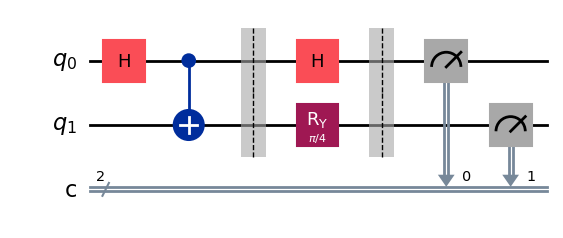

In [30]:
# Define the list of Quantum Circuits
# for all the scenarios for quantum strategies
circuits = []

# Define the list for the pairs of inputs
# for all the scenarios for quantum strategies
input_pairs = []


# For each possible Alice's input values
for x_in in [0, 1]:

    # For each possible Bob's input values
    for y_in in [0, 1]:
        
        # Append the current pair of input values
        # to the corresponding list of input pairs
        input_pairs.append((x_in, y_in))
        
        # Create the Quantum Circuit for
        # the Bell State to win the Clauser–Horne–Shimony–Holt (CHSH) game,
        # based on the current input pair (x,y) for the Quantum Strategy,
        # appending it to the corresponding list
        circuits.append(create_chsh_circuit(x_in, y_in))


# Print a log message for the last Quantum Circuit for
# the Bell State to win the Clauser–Horne–Shimony–Holt (CHSH) game,
# corresponding to the input pair (x=1, y=1)
print("\033[1mQuantum Circuit for Inputs (x=1,y=1)\033[0m\n" +\
      "(Check your Exercises 1 & 2 Implementation):")


# If there is a total of four Quantum Circuits for
# the Bell State to win the Clauser–Horne–Shimony–Holt (CHSH) game,
# based on the current input pair (x,y) for the Quantum Strategy
if len(circuits) == 4:
    
    # Display the last Quantum Circuit for the Bell State
    # to win the Clauser–Horne–Shimony–Holt (CHSH) game,
    # corresponding to the input pair (x=1, y=1)
    display(circuits[3].draw("mpl"))
    
# If there is not a total of four Quantum Circuits for
# the Bell State to win the Clauser–Horne–Shimony–Holt (CHSH) game,
# based on the current input pair (x,y) for the Quantum Strategy 
else:
    print("All the required Quantum Circuits were not generated!\n" +\
          "Run previous cell after completing Exercises 1 & 2.")

***


### Simulation: Playing the Game Many Times

Real **Quantum Computers** are *noisy* and sometimes hard to access. Thankfully, we can simulate their behavior quite accurately for small systems like this one. We will use **Qiskit**'s `AerSimulator` to run our four circuits many times ("shots") and collect statistics on *Alice*'s and *Bob*'s outputs (`a` and `b`).

Preparing the Quantum Circuits for the Quantum Simulator...

---- Simulation Results (Counts) ----
Inputs (x=0, y=0):
  Outcomes (Bob(b) & Alice(a)): {'00': 470, '01': 68, '10': 60, '11': 426}
Inputs (x=0, y=1):
  Outcomes (Bob(b) & Alice(a)): {'00': 430, '01': 75, '10': 75, '11': 444}
Inputs (x=1, y=0):
  Outcomes (Bob(b) & Alice(a)): {'00': 460, '01': 77, '10': 75, '11': 412}
Inputs (x=1, y=1):
  Outcomes (Bob(b) & Alice(a)): {'00': 76, '01': 434, '10': 438, '11': 76}

Plotting Results...


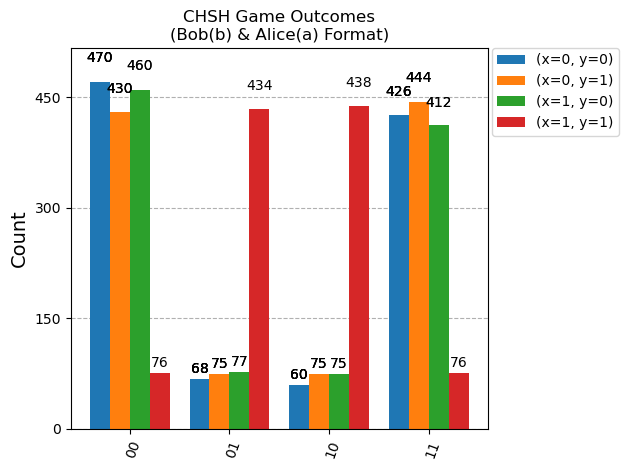

In [31]:
# Set up the Backend from the Qiskit Aer Simulator
backend = AerSimulator()

# Create the Pass Manager for the transpilation of
# the Quantum Circuit for the Backend defined before
# and with some optimization settings
pm = generate_preset_pass_manager(backend = backend,
                                  optimization_level = 1)

# Define the number of shots
# for the Quantum Simulation
num_shots = 1024


# Print a log message for the preparation of
# the Quantum Circuits for the Quantum Simulation
print("Preparing the Quantum Circuits for the Quantum Simulator...")

# Transpile the Quantum Circuits
# for the Quantum Simulation
isa_qc_chsh = pm.run(circuits)


# Set up the Sampler with the Backend defined before 
sampler_chsh = Sampler(mode = backend)

# Submit the transpiled Quantum Circuit
# to the Sampler and execute it,
# retrieving the corresponding job
job_chsh = sampler_chsh.run(isa_qc_chsh,
                            shots = num_shots)

# Get the results of the job
# executed from the Sampler 
results_chsh = job_chsh.result()

# Retrieve the list of discrete counts of
# the measurements on the results from the Sampler
counts_list = [results_chsh[i].data.c.get_counts()
               for i in range(len(circuits))]


# Print a log message for the Quantum Simulation results
print("\n\033[1m---- Simulation Results (Counts) ----\033[0m")


# For every indexed pair of inputs for
# Alice's and Bob's Quantum Strategies
for i, (x, y) in enumerate(input_pairs):
    
    # Print the pair of inputs for
    # Alice's and Bob's Quantum Strategies
    print(f"Inputs (x={x}, y={y}):")
    
    # Sort the list of discrete counts of
    # the measurements on the results from the Sampler
    sorted_counts = dict(sorted(counts_list[i].items()))
    
    # Print the sorted list of discrete counts of
    # the measurements on the results from the Sampler
    print(f"  Outcomes (Bob(b) & Alice(a)): {sorted_counts}")


# Print a long message for the plotting of
# the Quantum Simulation results
print("\nPlotting Results...")

# Display the histogram for the list of
# discrete counts (outcomes obtained) of
# the measurements on the results from the Sampler
# and the respective CHSH game outcomes for
# all possible Quantum Strategies
display(plot_histogram(counts_list,
                       legend = [f"(x={x}, y={y})" for x, y in input_pairs],
                       title = "CHSH Game Outcomes\n" +\
                               "(Bob(b) & Alice(a) Format)"))

***

### Analysis: Did They Beat the Classical Limit?

Now, the moment of truth! We need to analyze the simulation results (`counts_list`) to calculate the average win probability.

**Recap:**
*   **Win Condition:** `a XOR b == x AND y`
*   **Output Format:** Counts are for `'ba'` strings.
    *   `a XOR b = 0` for outcomes `'00'` (`b=0, a=0`) and `'11'` (`b=1, a=1`);
    *   `a XOR b = 1` for outcomes `'01'` (`b=0, a=1`) and `'10'` (`b=1, a=0`).

<div class="alert alert-block alert-success">
<b>Exercise 5: Analyze Quantum Circuit for CHSH Game</b>

**Your Goal:** Calculate the **win probability** for *Alice* and *Bob* for each input case (`x`, `y`) based on the **Quantum Simulation** results, and then determine their *overall* *average* **win probability** using the **Quantum Strategy**.

**Tasks:**
* **Task 1:** Determine the target `a XOR b` value for a win, given `x` and `y`;
* **Task 2:** Count the shots (`wins_for_this_case`) satisfying the win condition for the current (`x`, `y`).
</div>

In [32]:
# Define the dictionary for
# the winning probabilities
win_probabilities = {}

# Print a log message for the calculation of
# the winning probabilities for the CHSH game,
# following a Quantum Strategy
print("\033[1m ---- Calculating Winning Probabilities ----\033[0m")


# For each indexed pair of inputs for
# Alice's and Bob's Quantum Strategies
for i, (x, y) in enumerate(input_pairs):
    
    # Retrieve the list of discrete counts of
    # the measurements on the results from the Sampler,
    # for the current index of pair of inputs for
    # Alice's and Bob's Quantum Strategies
    counts = counts_list[i]
    
    
    ### WRITE YOUR CODE BELOW HERE ###
    
    # Task 1 - Target (a XOR b) value for winning
    
    # Compute the target (a XOR b) value
    # for winning the CHSH game
    target_xor_result = x & y    

    ### YOUR CODE FINISHES HERE    ###

    
    # Define the counter for the wins of
    # the CHSH game, considering the current
    # pair of inputs for Alice's and Bob's
    # Quantum Strategies
    wins_for_this_case = 0

    
    ### WRITE YOUR CODE BELOW HERE ###
    
    # Task 2 - Calculate the total number of shots that
    #          satisfy the winning condition determined above
    #          Check the 'target_xor_result'
    
    # For each pair of outputs
    # for Alice and Bob, resulting from
    # their current pair of inputs for
    # the respective Quantum Strategies
    for ba_bits, count in counts.items():
        
        # Retrieve the bits of the outputs
        # for Alice and Bob, resulting from
        # their current pair of inputs for
        # the respective Quantum Strategies
        b, a = int(ba_bits[0]), int(ba_bits[1])
        
        
        # If Alice's and Bob's outputs
        # matches the target (a XOR b) value
        # for winning the CHSH game
        if (a^b) == target_xor_result:
            
            # Count the number of CHSH game wins,
            # in the case that Alice's and Bob's
            # outputs matches the target (a XOR b)
            # value for winning the CHSH game
            wins_for_this_case += count

    ### YOUR CODE FINISHES HERE    ###

    
    # Compute the winning probability
    # for the current pair of inputs for
    # Alice's and Bob's Quantum Strategies
    prob = wins_for_this_case / num_shots if num_shots > 0 else 0
    
    # Append the winning probability
    # for the current pair of inputs for
    # Alice's and Bob's Quantum Strategies
    # to the dictionary for the winning probabilities
    win_probabilities[(x, y)] = prob
    
    # Print the current pair of inputs for
    # Alice's and Bob's Quantum Strategies,
    # the target (a XOR b) value for winning
    # the CHSH game and the respective winning probability
    print(f"  Inputs (x={x}, y={y}): Target (a XOR b) = {target_xor_result}\n" +\
          f"  * Winning Probability = {prob:.4f} ({prob * 100:.2f}%)")


# Compute the average winning probability
# for all the possible pair of inputs for
# Alice's and Bob's Quantum Strategies
avg_win_prob = sum(win_probabilities.values()) / 4.0

# Compute the theoretical winning probability
# for the CHSH game from Quantum Theory (~0.8536)
P_win_quantum_theory = np.cos(np.pi / 8)**2

# Compute the theoretical winning probability
# for the CHSH game from Classical Theory (=0.75)
P_win_classical_limit = 0.75


# Print a log message for the Overall Winning Performance results
print("\n\033[1m---- Overall Winning Performance ----\033[0m")

# Print the experimental average winning probability
# for the CHSH game, using Quantum Strategies
print(f"  Experimental Average Winning Probability: " +\
      f"{avg_win_prob:.4f} | {avg_win_prob * 100:.2f}%")

# Print the theoretical quantum winning probability
# for the CHSH game, using Quantum Strategies
print(f"  Theoretical Quantum Winning Probability:  " +\
      f"{P_win_quantum_theory:.4f} | {P_win_quantum_theory * 100:.2f}%")

# Print the classical limit winning probability
# for the CHSH game, using Classical Strategies
print(f"  Classical Limit Winning Probability:      " +\
      f"{P_win_classical_limit:.4f} | {P_win_classical_limit * 100:.2f}%")


# If the average winning probability for all the possible pair of
# inputs for Alice's and Bob's Quantum Strategies are greater
# than the classical limit winning probability for the CHSH game,
# using Classical Strategies (allowing a small simulation variance of 0.01)
if avg_win_prob > P_win_classical_limit + 0.01:
    
    # Print a log message for the success on winning
    # the CHSH game using Quantum Strategies
    print(f"\nSuccess! Your result ({avg_win_prob:.4f} | {avg_win_prob * 100:.2f}%)\n" + \
          "clearly beats the classical limit (0.75 | 75%)!\n")
    
    # Print a log message about the experimental average
    # winning probability for the CHSH game, using Quantum Strategies
    # be very close to the theoretical quantum winning probability
    print(f"It is likely close to the theoretical Quantum Prediction " +\
          f"({P_win_quantum_theory:.4f} | {P_win_quantum_theory * 100:.2f}%).")
    
# If the average winning probability for all the possible pair of
# inputs for Alice's and Bob's Quantum Strategies are greater
# than the classical limit winning probability for the CHSH game,
# using Classical Strategies (allowing noise or minor error of 0.02)
elif avg_win_prob > P_win_classical_limit - 0.02:
    
    # Print a log message for the insuccess on winning
    # the CHSH game using Quantum Strategies, despite
    # the Quantum Strategy beating the classical limit
    # (but not by a considerable probability)
    print(f"\nClose, but no cigar? Your result " +\
          f"({avg_win_prob:.4f} | {avg_win_prob * 100:.2f}%)\n" +\
          f"is around the classical limit " +\
          f"({P_win_classical_limit:.4f} | {P_win_classical_limit*100:.4f}%).\n")
    
    # Print a log message to check the solutions
    # in order to discover a possible error
    # in the experimental result provided
    print("Check your solutions for Exercises 1-4 carefully,\n" +\
          "especially the win counting logic in Exercise 4.")

# If the average winning probability for all the possible pair of
# inputs for Alice's and Bob's Quantum Strategies are lower
# than the classical limit winning probability for the CHSH game
else:
    
    # Print a log message for the insuccess on
    # winning the CHSH game using Quantum Strategies
    print(f"\nHmm, the result ({avg_win_prob:.4f} | {avg_win_prob * 100:.2f}%)\n" +\
          f"is unexpectedly low, even below the classical limit.\n")
    
    # Print a log message to check the solutions
    # in order to discover a possible error
    # in the experimental result provided
    print("There might be an error in Exercises 1-4.\n" +\
          "Please review your circuit and analysis code.")

 ---- Calculating Winning Probabilities ----
  Inputs (x=0, y=0): Target (a XOR b) = 0
  * Winning Probability = 0.8750 (87.50%)
  Inputs (x=0, y=1): Target (a XOR b) = 0
  * Winning Probability = 0.8535 (85.35%)
  Inputs (x=1, y=0): Target (a XOR b) = 0
  * Winning Probability = 0.8516 (85.16%)
  Inputs (x=1, y=1): Target (a XOR b) = 1
  * Winning Probability = 0.8516 (85.16%)

---- Overall Winning Performance ----
  Experimental Average Winning Probability: 0.8579 | 85.79%
  Theoretical Quantum Winning Probability:  0.8536 | 85.36%
  Classical Limit Winning Probability:      0.7500 | 75.00%

Success! Your result (0.8579 | 85.79%)
clearly beats the classical limit (0.75 | 75%)!

It is likely close to the theoretical Quantum Prediction (0.8536 | 85.36%).


In [33]:
# Submit your answer for the exercise 5 of the lab 1,
# using the following code from the Grade
grade_lab1_ex5(counts_list, avg_win_prob)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


***

### Conclusion: The Quantum Edge

So, what did we find? If you successfully completed the exercises, your simulation should clearly show that *Alice* and *Bob*, using their shared **quantum entangled** qubits and clever **Quantum Measurements**, achieved an average win rate **significantly** higher than the **classical limit** of **75.0%**, likely approaching the **theoretical quantum maximum** of around **85.4%**.

This is not just a mathematical trick. It reflects how nature works at its most fundamental level. **Quantum Entanglement** allows for **correlations** *between distant* *particles* *that are stronger than any* **classical theory** *can explain*. This *"spooky action at a distance"* **does not allow faster-than-light communication**, *but it underpins many quantum technologies*.

**Discussion Point:** Based on these results, what does the **CHSH game** demonstrate about the nature of reality compared to classical intuition? Can you think of any potential applications where these **stronger-than-classical correlations** might be useful?

***

## 2.2. Quantum Teleportation - Sending Secrets with Spooky Action

Imagine *Alice* has a qubit (`q0`) in a specific, delicate **quantum state** (`|ψ⟩`). She wants to send this exact **quantum state** to *Bob*, who is far away. She cannot simply physically send the qubit (maybe it is too fragile, or she needs the original *particle*). Can she somehow *transfer only the* **quantum state** *itself*?

Classically, this seems impossible. If *Alice* measures her qubit to see what **quantum state** it is in, the **Quantum Measurement** itself will likely collapse the **Quantum Superposition** and destroy the original **quantum state**.

Enter **Quantum Teleportation**! It's a remarkable protocol that uses **quantum entanglement** and **classical communication** to transfer an unknown quantum state from one qubit to another.

**Disclaimer:** We are *teleporting* the **quantum state**, not the *physical* *particle*! *No people are being beamed up here*.

**Your Goal:** In this lab, you will implement the **Quantum Teleportation Protocol** using **Qiskit**. You will complete the code to prepare the necessary quantum resources, perform the key steps, and verify that *Bob* *successfully receives* *Alice*'s **quantum state**.

***

### The Quantum Teleportation Protocol (Step-by-Step)

The protocol requires three qubits and two classical bits:
*   **`q0`:** *Alice*'s qubit, initially in the **quantum state** `|ψ⟩` we want to *teleport*;
*   **`q1`:** *Alice*'s half of a shared **quantum entangled** pair;
*   **`q2`:** *Bob*'s half of the shared **quantum entangled** pair;
*   **`c0`, `c1`:** Classical bits to store *Alice*'s measurement results.

Here is the plan:
1.  **(Optional) Prepare Alice's quantum state `|ψ⟩` on `q0`.** (We will create a specific **quantum state** like `|+⟩` for verification);
2.  **Create Quantum Entanglement:** Generate a **Bell State** pair between `q1` and `q2`;
3.  **Alice's operations:** *Alice* performs a **"Bell State Measurement (BSM)"** on her two qubits (`q0` and `q1`) and stores the classical results in `c0` and `c1`;
4.  **Classical communication:** *Alice* sends her two classical bits (`c0`, `c1`) to *Bob*;
5.  **Bob's corrections:** *Bob* applies specific quantum gates (X and/or Z) to his qubit (`q2`), conditioned on the values of `c0` and `c1` he received.

If everything is done correctly, *Bob*'s qubit `q2` will end up in the **quantum state** `|ψ⟩`, the original **quantum state** of *Alice*'s `q0`!

***

<div class="alert alert-block alert-info">
<b>For your In-Depth Study </b>

* For a more in-depth explanation and exploration of **Quantum Teleportation Protocol**, you can refer to the **IBM Quantum Learning** resources: [**Quantum Teleportation Protocol**](https://quantum.cloud.ibm.com/learning/courses/basics-of-quantum-information/entanglement-in-action/quantum-teleportation) and [**Quantum Entanglement in Action**](https://quantum.cloud.ibm.com/learning/courses/basics-of-quantum-information/entanglement-in-action/quantum-teleportation) by *John Watrous*;
* These are part of his [**Basics of Quantum Information**](https://quantum.cloud.ibm.com/learning/courses/basics-of-quantum-information) course.
</div>

***

### Tool: Qiskit Dynamic Quantum Circuits

For *Bob*'s actions depending on *Alice*'s measurements, we use **Dynamic Quantum Circuits**. This allows *classical information* from *mid-circuit* **Quantum Measurements** to *influence later quantum operations*. This capability is crucial for protocols like the **Quantum Teleportation Protocol** and for creating *efficient long-range* **Quantum Entanglement** on **quantum hardware**, as explored in recent research. [\[7\]](https://journals.aps.org/prxquantum/abstract/10.1103/PRXQuantum.5.030339) You can also see [**Qiskit Documentation on Dynamic Quantum Circuits and Conditional Operations**](https://quantum.cloud.ibm.com/docs/guides/classical-feedforward-and-control-flow) for more information.

***

### Building the Quantum Teleportation Protocol Circuit in Qiskit

<div class="alert alert-block alert-success">
<b>Exercise 6: Quantum Teleportation Protocol</b>

**Your Goal:** Construct the complete **Quantum Circuit** for *teleporting* an unknown **quantum state** from *Alice*'s *message qubit* to *Bob*'s *target qubit*, utilizing an **quantum entangled** **Bell State** pair and *mid-circuit* **Quantum Measurements** *with conditional operation*.

**Tasks:**
* **Step 1:** Create the shared **quantum entangled** **Bell State** pair $(|00\rangle + |11\rangle) / \sqrt{2}$ between `q1` and `q2`;
* **Step 2:** Implement *Alice*'s **Bell State Measurement (BSM)** gates (before actual **Quantum Measurement**);
* **Step 3:** Implement *Bob*'s *conditional correction* gates based on *Alice*'s **Quantum Measurement** results.
</div>

***

Full Quantum Teleportation Protocol Circuit
(Check your Exercises 1, 2, 3):


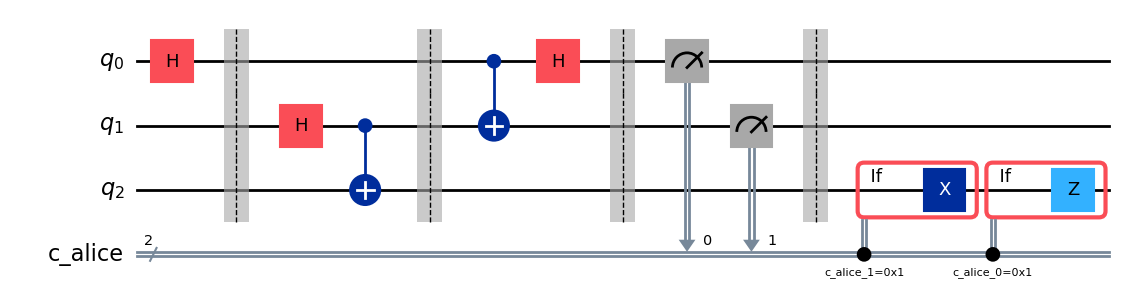

In [34]:
# Create a Quantum Register,
# with three quantum bits for
# the Quantum Teleportation Protocol
qr_tele = QuantumRegister(3, name = "q")

# Create a Classical Regiser,
# with two classical bits for
# the Alice's Quantum Measurement outcomes
cr_alice_tele = ClassicalRegister(2, name = "c_alice")


# Create a new Quantum Circuit
# for the Quantum Teleportation Protocol,
# with the Quantum Register and
# Classical Register defined before
# Note:
# * For verification with statevector,
#   we do not measure Bob's final qubit
#   in this Quantum Circuit
# * If we were to run on real quantum
#   hardware (i.e., a Quantum Computer),
#   and verify by counts, we had to
#   add a classical bit for Bob
teleport_qc = QuantumCircuit(qr_tele, cr_alice_tele,
                             name = "Teleportation")

# Apply a H (Hadamard) gate to qubit 0 to
# prepare Alice's original message quantum state
# defined as |ψ⟩ = |+⟩ = 1/sqrt(2) * (|0⟩ + |1)
teleport_qc.h(qr_tele[0])

# Apply a barrier to all the qubits
teleport_qc.barrier()


### WRITE YOUR CODE BELOW HERE ###

# Step 1: Create Bell State pair between the qubits
#         q1 (for Alice) and q2 (for Bob)

# Apply a H (Hadamard) gate to qubit 1
teleport_qc.h(qr_tele[1])

# Add a CNOT (Controlled-Not) gate to
# qubits 1 (control) and 2 (target)
teleport_qc.cx(1, 2)

### YOUR CODE FINISHES HERE    ###


# Apply a barrier to all the qubits
teleport_qc.barrier()


### WRITE YOUR CODE BELOW HERE ###

# Step 2: Alice's Bell State Measurement (BSM gates part)

# Add a CNOT (Controlled-Not) gate to
# qubits 0 (control) and 1 (target), as part of
# the Alice's Bell State Measurement (BSM)
teleport_qc.cx(0, 1)

# Apply a H (Hadamard) gate to qubit 0, as part of
# the Alice's Bell State Measurement (BSM)
teleport_qc.h(0)

### YOUR CODE FINISHES HERE    ###


# Apply a barrier to all the qubits
teleport_qc.barrier()


# Add measurement operations to all qubits
# in Alice's side (the original quantum state
# and her share of the quantum entangled pair)
teleport_qc.measure(qr_tele[0], cr_alice_tele[0])
teleport_qc.measure(qr_tele[1], cr_alice_tele[1])


# Apply a barrier to all the qubits
teleport_qc.barrier()


### WRITE YOUR CODE BELOW HERE ###

# Step 3: Bob's Conditional Corrections on qubit 2
# Note: 
# * .c_if() on gates like XGate() no longer
#   works directly as in older Qiskit versions
# * The recommended method in Qiskit 1.0+ is to 
#   use the new `if_test` context manager

# Within the context of the bit b be 1,
# it will be applied a quantum operation
# based on that conditional context
with teleport_qc.if_test((cr_alice_tele[1], 1)):
                          
    # Apply a X (Pauli-X) gate to qubit 2
    teleport_qc.x(2)

# Within the context of the bit a be 1,
# it will be applied a quantum operation
# based on that conditional context
with teleport_qc.if_test((cr_alice_tele[0], 1)):
                          
    # Apply a Z (Pauli-Z) gate to qubit 2
    teleport_qc.z(2)

### YOUR CODE FINISHES HERE    ###


# Print a log message for the full Quantum Circuit
# for the Quantum Teleportation Protocol
print("Full Quantum Teleportation Protocol Circuit\n" +\
      "(Check your Exercises 1, 2, 3):")

# Display a drawing of the Quantum Circuit
# using the MatPlotLib library ("mpl")
display(teleport_qc.draw("mpl"))

In [35]:
# Submit your answer for the exercise 6 of the lab 1,
# using the following code from the Grade
grade_lab1_ex6(teleport_qc)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


***

### Simulation and Verification

How do we verify that the **Quantum Teleportation Protocol** worked? We cannot directly 'see' the **quantum state** of *Bob*'s qubit after the protocol. However, since we *prepared* *Alice*'s initial **quantum state** `|ψ⟩` (we chose `|+⟩`), we can use a special type of simulation to check if *Bob*'s qubit `q2` ended up in that same **quantum state**.

We will use `AerSimulator` with `save_statevector` to check if *Bob*'s qubit `q2` ends up in *Alice*'s original **quantum state** (`|+⟩`). This simulator calculates the final **quantum state** vector.

***

<div class="alert alert-block alert-success">
<b>Exercise 7: Analyze Result of Quantum Teleportation Protocol (No Grading)</b>

**Your Goal:** Verify the successful **quantum teleportation** of *Alice*'s **quantum state** to *Bob*'s qubit by simulating the **Quantum Circuit** and visualizing the final **quantum state** of *Bob*'s qubit.

**Task:**
* Extract the final statevector and use `plot_bloch_multivector` to visualize *Bob*'s qubit (`q2`);
* Compare to *Alice*'s initial **quantum state** (`q0`).
</div>

***

Using statevector simulator...
Running statevector simulation...
Simulation successful!
Statevector retrieved successfully!

Visualizing final qubit quantum states
(q2 should match initial q0 state |+⟩):


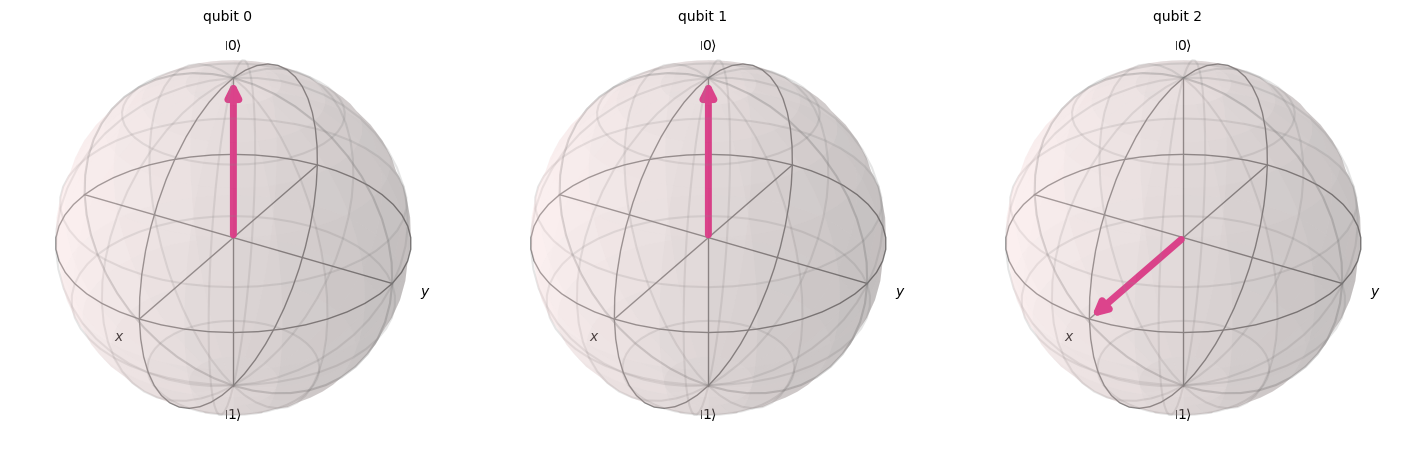

In [36]:
# Display the plots generated by the MatPlotLib
# library directly in the notebook
%matplotlib inline


# Import the Bloch multivector plotting module
# from the Qiskit's Visualization module
from qiskit.visualization import plot_bloch_multivector


# Print a log message about the use of
# the Statevector Simulator for the Quantum Simulation
print("Using statevector simulator...")

# Set up the Backend from the Qiskit Aer Simulator
# as being the Statevector Simulator
sv_simulator = AerSimulator(method = "statevector")

# Create a copy of the Quantum Teleportation Protocol Circuit
# to use in the Quantum Simulation with the Statevector Simulator
teleport_qc_sv = teleport_qc.copy()

# Save the state-vector representation of
# the Quantum Teleportation Protocol Circuit
teleport_qc_sv.save_statevector()

# Print a log message about the execution of
# the Statevector Simulator for the Quantum Simulation
print("Running statevector simulation...")

# Submit the Quantum Teleportation Protocol Circuit
# to the Statevector Simulator and execute it,
# retrieving the corresponding job
# Note:
# * shots = 1 is default option for the Statevector Simulator
job_sv = sv_simulator.run(teleport_qc_sv)

# Get the results of the job executed
# from the Statevector Simulator 
result_sv = job_sv.result()


# If the Quantum Simulation using the Statevector
# Simulator completed successfully
if result_sv.success:
  
    # Print a log message about the successful execution of
    # the Statevector Simulator for the Quantum Simulation
    print("Simulation successful!")
    
    # Retrieve the final state-vector
    # from the successful execution of
    # the Statevector Simulator for the Quantum Simulation 
    final_statevector = result_sv.get_statevector()
    
    # Print a log message about the successful retrieval of
    # the quantum state-vector from the Statevector Simulator
    # for the Quantum Simulation
    print("Statevector retrieved successfully!")
    
    # Print a log message about the visualization of
    # the final quantum states of the qubit 0 (original)
    # and qubit 2 (target) - they should be equal
    # Notes:
    # * The qubit 0 was on the quantum state |+⟩
    #   (points along +X axis of the Bloch Sphere)
    # * After the quantum teleportation, the qubit 2
    #   should be in the quantum state |+⟩ as well
    # * The quantum states of the qubit 0 and qubit 1
    #   after Alice's Quantum Measurement, should have collapsed
    print("\nVisualizing final qubit quantum states\n" +\
          "(q2 should match initial q0 state |+⟩):")
    
    # Display the plot of the Bloch multivector of
    # the final quantum state-vector retrieved from
    # the Statevector Simulator for the Quantum Simulation
    display(plot_bloch_multivector(final_statevector))
    
# If the Quantum Simulation using the Statevector
# Simulator does not completed successfully
else:
    
    # Print a log message about the failed execution of
    # the Statevector Simulator for the Quantum Simulation
    print(f"Statevector simulation failed! Status: {result_sv.status}")

*** 

### Interpreting the Results

If Exercise 6 was correct, you should see:
* `q0` (*Alice*'s *original* **quantum state**): Random **quantum state** (collapsed by **Quantum Measurement**);
* `q1` (*Alice*'s **quantum entangled state**): Random **quantum state** (collapsed by **Quantum Measurement**);
* `q2` (*Bob*'s **quantum entangled state**): Bloch sphere vector pointing along the **positive X-axis**. This is the `|+>` **quantum state**, matching *Alice*'s initial `q0`!

**Success!** The **quantum state** `|ψ⟩ = |+⟩` was teleported!

***

### Conclusion: The Magic of Quantum Entanglement and Information

You have successfully implemented the **Quantum Teleportation Protocol**!

**Key Takeaways**:
* The **Quantum Teleportation Protocol** transfers an *unknown* **quantum state** using *shared* **Quantum Entanglement** and **classical communication**;
* It *does not transfer* the *physical* *particle* itself;
* The original **quantum state** on *Alice*'s qubit is **destroyed** (*consistent with the* **No-Cloning Theorem**);
* Requires **classical communication** (**Alice**'s **Quantum Measurement** results to *Bob*), so **no faster-than-light information transfer**.

The **Quantum Teleportation Protocol** is foundational for **Quantum Communication** (as well as the future **Quantum Internet**) and **Quantum Computation**.

**Discussion Point**: Why cannot *Alice* just measure `q0` (e.g., in the **Z**-basis, then the **X**-basis) and send results to *Bob* for reconstruction? What is different about the **Quantum Teleportation Protocol**?

***

In [37]:
# Import the function to check the lab completion status
# for the labs of the Qiskit Global Summer School 2025
# from the Grader library
from qc_grader.grader.grade import check_lab_completion_status


# Check the current lab completion status
# for the labs of the Qiskit Global Summer School 2025
check_lab_completion_status("qgss_2025")

Lab 0: 2/2 exercises completed (100%)
    ✅ 1752 participants have completed this lab
Lab 1: 9/9 exercises completed (100%)
    ✅ 1016 participants have completed this lab
Lab 2: 0/7 exercises completed (0%)
    ✅ 240 participants have completed this lab
Lab 3: 0/5 exercises completed (0%)
    ✅ 0 participants have completed this lab
Lab 4: 0/6 exercises completed (0%)
    ✅ 0 participants have completed this lab


***

# (Bonus Challenge) Quantum Teleportation Protocol on a Real Quantum Hardware

We have seen the **Quantum Teleportation Protocol** work perfectly on a **quantum simulator**. Now, let's try it on a **real** **IBM Quantum Backend**! This is where the true challenges and excitement of **Quantum Computing** lie. **Real quantum devices** have *noise* and *limited qubit connectivity*.

***

<div class="alert alert-block alert-warning">
<b>Dynamic Quantum Circuits are being upgraded!</b>

There is currently an update going on for **Dynamic Quantum Circuits** on the **real quantum hardware**, and you are one of the first people to be able to *test the new version*! However, this early access comes with some caveats: 
* 1. We need to set some additional lines of codes for them to activate the early access (see below);
* 2. This early access does not work when using ``Session`` or ``Batch`` with a with... (e.g., with ``Batch(...)``). You can, however, pass one directly to the primitive (e.g., ``Sampler(mode = batch)``);
* 3. You cannot use a ``ClassicalRegister`` of more than 32 bits in an ``if_test`` condition. You can, however, use multiple ``ClassicalRegisters``, each of <=32 bits;
* 4. No nested conditional;
* 5. Cannot have measure or reset inside a conditional block.
</div>
    
***

Two steps are needed to use **Dynamic Quantum Circuits** on the **real quantum hardware**:

**Step 1:** You need to add the instruction to the **real quantum hardware** you use:

```python
    # (1) Patch the Backend target with IfElseOp
    from qiskit.circuit import IfElseOp
    backend.target.add_instruction(IfElseOp, name = "if_else")
```

**Step 2:** When submitting the jobs you need to enable the experimental options:

```python
    # (2) Submit the job with the experimental option
    sampler.options.experimental = {"execution_path" : "gen3-experimental"}
```

***

### Dynamic Quantum Circuits: A Key for Real Quantum Hardware

The **Quantum Teleportation Protocol** inherently requires **Dynamic Quantum Circuits**: *Alice* **measures** her qubits, and *Bob* **classically communicates** these results to decide which correction quantum gates to apply to his qubit. **Qiskit** enables these **"mid-circuit measurements"** and **"classical feed-forward" operations**.

Recent research, such as the work by Bäumer et al. in 2024 [\[7\]](https://journals.aps.org/prxquantum/abstract/10.1103/PRXQuantum.5.030339), demonstrates the power of **Dynamic Quantum Circuits**. They show that for tasks like **CNOT** gate **quantum teleportation** and preparing **GHZ States** over *long distances*, **Dynamic Quantum Circuits** *can outperform their purely unitary counterparts on large-scale devices* by *keeping the* **Quantum Circuit** *depth constant regardless of the distance*.

For our **Quantum Teleportation Protocol**, **Dynamic Quantum Circuits** allow *Alice*'s measurement outcomes to directly control *Bob*'s quantum gate applications in real time on the **quantum processor**. Accessing **IBM Quantum Backends** is done through the **IBM Cloud**. You will need an **IBM Cloud** account with **Quantum services** enabled.

***

### The Challenge: How Far Can You Send It?

**Your Goal:** Successfully **quantum teleport** a **quantum state** (e.g., $|+\rangle$) from *0th* qubit (*Alice*'s message) to another qubit (*Bob*'s) on a **real** **IBM Quantum Backend**, ideally choosing qubits that are not directly connected on the chip by using **Qiskit**'s **Dynamic Quantum Circuits**. Observe and report the fidelity of the **Quantum Teleportation Protocol**. Try to improve it!

**Basic steps for a real Quantum Backend run:**

You can find more detailed explanations in **"lab0"**, but here we give you an abstracted intro:

1.  **Set up IBM Quantum Access (via IBM Cloud):**
    * If you do not have one, create an **IBM Cloud** account and enable access to **IBM Quantum Services**;
    * Get your **API** token from the **IBM Quantum** dashboard on **IBM Cloud**;
    * Use `QiskitRuntimeService` to save your account and list available **Backends**:

       ```python
        from qiskit_ibm_runtime import QiskitRuntimeService
    
        QiskitRuntimeService.save_account(channel = "ibm_quantum_platform",
                                          token = "YOUR_IBM_CLOUD_API_TOKEN",
                                          instance = "YOUR_CRN_INSTANCE_NAME",
                                          overwrite=True)
    
        service = QiskitRuntimeService(name = "qgss-2025")
        
        print(service.backends())
        ```
       
2.  **Choose a Backend:**
    * Select an available **Backend** from the list. Selecting the [**least_busy**](https://quantum.cloud.ibm.com/docs/api/qiskit-ibm-runtime/qiskit-runtime-service) **Quantum Processing Unit (QPU)** is also a good choice;
    * Examine its **coupling map** to find suitable qubits. For this challenge, try to pick qubits for *Alice*'s message (`q_A_msg`) and *Bob*'s final qubit (`q_B_ent`) that are *"far apart"* or *not directly connected*. *Alice*'s **quantum entangled** qubit (`q_A_ent`) should ideally be connectable to both `q_A_msg` (for her **Bell State Measurement**) and `q_B_ent` (for creating the initial **Bell State** pair).

        ```python
        # e.g., "ibm_brisbane" or a simulator
        # like "ibmq_qasm_simulator" to test flow
        backend_name = "ibm_your_chosen_backend"
        
        backend = service.least_busy()
        
        print(f"Coupling Map: {backend.configuration().coupling_map}")
        print(f"Number of qubits: {backend.configuration().n_qubits}")
        
        # Comment if it is not needed
        from qiskit.visualization import plot_gate_map
        
        # Visualizes the qubit connectivity of the Backend
        display(plot_gate_map(backend)) 
        
        ```
        
You can keep most of the code the same. To use a **real** **Quantum Processing Unit (QPU)** instead of a **Quantum Simulator**, simply pass the **real** **Backend** object to the `Sampler`. However, it's crucial to transpile your **Quantum Circuit** using a `PassManager`, especially when targeting actual **quantum hardware**.

***

<div class="alert alert-block alert-info">

<b>Tips</b>

* **Technical Reference for Long-Range Quantum Entanglement:**
    * For a deeper technical dive into creating **Quantum Entanglement** over distances on **IBM** **hardware**, including techniques that might inspire your qubit selection or **Quantum Circuit** optimization, refer to the tutorial [**Efficiently Generating Long-Range Entanglement**](https://quantum.cloud.ibm.com/docs/tutorials/long-range-entanglement).
<br><br>
* **Simulating Larger Quantum Circuits (20+ Qubits):**
    * If you are designing or testing **Quantum Teleportation** schemes that scale to 20 qubits or more for the total **Quantum Circuit** size (including *Alice*'s message, her *ancilla* qubit, *Bob*'s qubit, and any intermediary qubits for routing or advanced **Quantum Teleportation** schemes), **simulating the full statevector can become computationally intensive**;
    * For such larger **Quantum Circuits**, if your **Quantum Teleportation Protocol Circuit** (or components of it, like **Bell State** creation and **Bell State Measurements (BSMs)**) can be constructed using only **Clifford** gates (**H**, **S**, **X**, **Y**, **Z**, **CNOT**, **SWAP**, and their combinations), you can use a more efficient **Quantum Simulator**;
    * **Recommendation:** Use `AerSimulator(method = "stabilizer")`. The **Stabilizer Simulator** is optimized for **Clifford** **Quantum Circuits** and can handle much larger qubit counts efficiently.
</div>

***

Good luck pushing the limits of **quantum state** transfer! Share your try and result with participants and discuss how you can send qubits "farther".

***

## References

1. Young, Thomas (1804) I. The Bakerian Lecture. Experiments and Calculations Relative to Physical Optics. Phil. Trans. R. Soc. 941–16.
2. Thomson, George and Reid, Alexander (1927). Diffraction of Cathode Rays by a Thin Film.  Nature 119(3007), 890.
3. Feynman, Richard (1965). Lectures on Physics. Vol. 3. Quantum Mechanics.
4. Schrödinger, Erwin (1935). Die Gegenwärtige Situation in der Quantenmechanik. Naturwissenschaften 23, 807–812.
5. Clauser, John, Horne, Michael, Shimony, Abner and Holt, Richard (1969). Proposed Experiment to Test Local Hidden-Variable Theories. Phys. Rev. Lett., 23(15), 880–884.
6. Bouwmeester, Dirk, Pan, Jian-Wei, Mattle, Klaus, Eibl, Manfre, Weinfurter, Harald and Zeilinger, Anton (1997). Experimental Quantum Teleportation. Nature, 390(6660), 575–579.
7. Bäumer, Elisa, et al. (2024). Efficient Long-Range Entanglement Using Dynamic Circuits. PRX Quantum, 5(3), 030-039.

***

# Additional information

**Created by:** Sophy Shin, James Weaver

**Advised by:** Marcel Pfaffhauser, Jessie Yu, Junye Huang, Borja Peropadre 

**Reviewed by:** Meltem Tolunay, Abby Cross

**Version:** 1.1.1

***

Congratulations! You finished **Lab 1** of the **IBM's Qiskit Global Summer School 2025**! 🎉 🎉 🎉

Made with ❤ by Rúben André Barreiro (and adapted from **IBM Quantum**).